# Table of Contents:
1. [Library Imports](#li)
2. [Data Preparation](#dp)
3. [Method Comparison](#mc)
4. [Clustering](#cl)
5. [UMAP](#u)
6. [Final Solutions](#f)

# 1. Library Imports
<a id='li'></a>

In [1]:
### IMPORTS
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install umap-learn
# !pip install scipy
# !pip install ipython


### LIBRARIES
import pandas as pd
import numpy as np
import umap

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from collections import Counter

from scipy.spatial.distance import cdist

from utils1 import knn_imputer
from utils2 import *

### WARNINGS
import warnings
warnings.filterwarnings('ignore')

### AUTORELOAD
%load_ext autoreload
%autoreload 2

# Set the path to the data files
# path = 'Data/New_Data/project_data_almano_educ_perc.csv'
#path = 'Data/New_Data/project_data_95_educ_perc.csv'
path = 'Data/New_Data/project_data_99_educ_perc.csv'

# 2. Data Preparation
<a id='dp'></a>

#### Import the data

The three methods of outlier removal were tested, however, only the results for the removal of outliers below the 0.1st percentile and above the 99.9th percentile (for each variable being studied) is shown in this notebook.

In [2]:
data = pd.read_csv(path)

#### Define metrics to study

Both metrics with and without meat were were tested, however, only the results of clustering without using the meat variable are shown in this notebook.

In [3]:
preference_metrics = ['beer', 'bottled_water', 'bread', 'meat', 'dairy', 'fresh_foods', 'frozen_foods', 'fruit_beverages', 'pastry', 'sodas', 'toiletries', 'veggies', 'wines']
# preference_metrics_perc = ['percentage_beer', 'percentage_bottled_water', 'percentage_bread', 'percentage_meat', 'percentage_dairy', 'percentage_fresh_foods', 'percentage_frozen_foods', 'percentage_fruit_beverages', 'percentage_pastry', 'percentage_sodas', 'percentage_toiletries', 'percentage_veggies', 'percentage_wines']

preference_metrics_no_meat = ['beer', 'bottled_water', 'bread', 'dairy', 'fresh_foods', 'frozen_foods', 'fruit_beverages', 'pastry', 'sodas', 'toiletries', 'veggies', 'wines']
# preference_metrics_perc_no_meat = ['percentage_beer', 'percentage_bottled_water', 'percentage_bread', 'percentage_dairy', 'percentage_fresh_foods', 'percentage_frozen_foods', 'percentage_fruit_beverages', 'percentage_pastry', 'percentage_sodas', 'percentage_toiletries', 'percentage_veggies', 'percentage_wines']

In [4]:
preference = data[preference_metrics]
# preference_perc = data[preference_metrics_perc]

preference_no_meat = data[preference_metrics_no_meat]
# preference_perc_no_meat = data[preference_metrics_perc_no_meat]

#### Scale the data

In [5]:
# Defining the scalers
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

In [6]:
# Scaling the data
pref_no_scl = preference_no_meat.copy()
pref_st_scl = standard.fit_transform(preference_no_meat)
pref_mm_scl = minmax.fit_transform(preference_no_meat)
pref_rb_scl = robust.fit_transform(preference_no_meat)

In [7]:
# Creating the scaled dataframes
preference_no_scl = preference_no_meat.copy()
preference_no_scl[preference_metrics_no_meat] = pref_no_scl

preference_st_scl = preference_no_meat.copy()
preference_st_scl[preference_metrics_no_meat] = pref_st_scl

preference_mm_scl = preference_no_meat.copy()
preference_mm_scl[preference_metrics_no_meat] = pref_mm_scl

preference_rb_scl = preference_no_meat.copy()
preference_rb_scl[preference_metrics_no_meat] = pref_rb_scl

In [35]:
# Creating equal samples of the differently scaled dataframes
sample_original = preference.sample(frac=0.2, random_state=1)
sample_no_scl = preference_no_scl.sample(frac=0.2, random_state=1)
sample_st_scl = preference_st_scl.sample(frac=0.2, random_state=1)
sample_mm_scl = preference_mm_scl.sample(frac=0.2, random_state=1)
sample_rb_scl = preference_rb_scl.sample(frac=0.2, random_state=1)

---

# 3. Clustering Method Comparison
<a id='mc'></a>

Here different clustering methods performance (based on R^2) will be compared to determine weather if it is even worth it to test all of them. This test will be performed for different types of scaled data.

- [No Scaler](#cmc-no)
- [Standard Scaler](#cmc-st)
- [MinMax Scaler](#cmc-mm)
- [Robust Scaler](#cmc-rb)

First, we will define the base clustering methods to be used in this test. Note that hierarchical clustering will be performed with eucledian distances as this is what is used by k-means, in order to ensure a fair comparison.

In [146]:
kmeans = KMeans(init='k-means++', n_init=10, random_state=1)
hierarchical = AgglomerativeClustering(metric='euclidean') # eucledian distance as kmeans uses it

### No Scaler <a id='cmc-no'></a>

In [149]:
pref_no_r2_scores = get_r2_df(sample_no_scl, preference_metrics_no_meat, kmeans, hierarchical)
pref_no_r2_scores

,kmeans,complete,average,single,ward
2,0.265066,0.038072,0.038072,0.006621,0.255768
3,0.432291,0.064200,0.039762,0.015391,0.414827
4,0.506018,0.094475,0.068715,0.017457,0.489387
5,0.569350,0.115441,0.073173,0.027370,0.548995
6,0.611962,0.117131,0.101854,0.043887,0.590121
7,0.640593,0.121597,0.111764,0.045997,0.622783
8,0.667119,0.125917,0.113473,0.046324,0.648697
9,0.687110,0.138925,0.114379,0.048596,0.672364


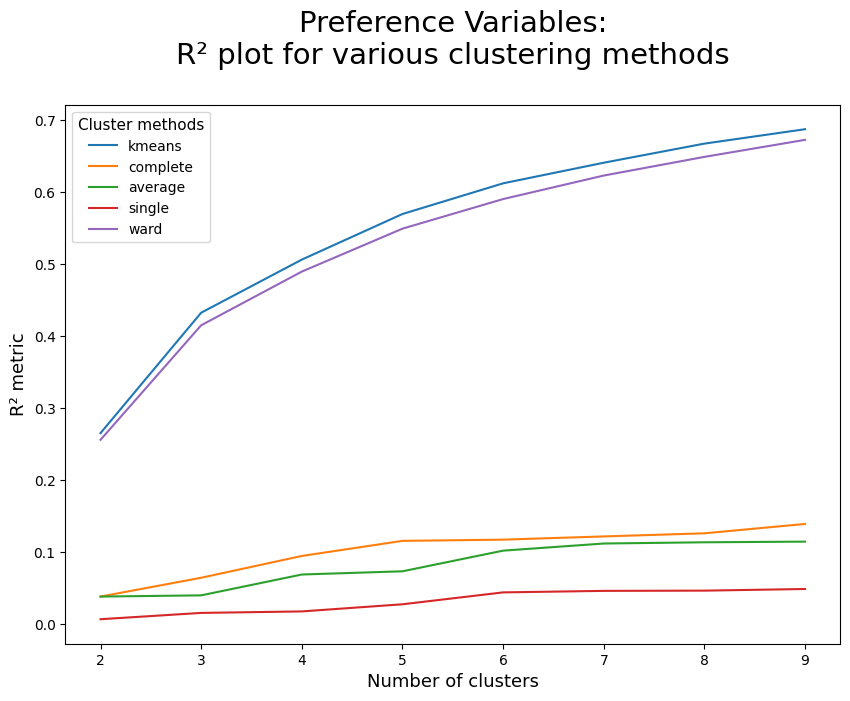

In [150]:
plot_r2_scores(pref_no_r2_scores)

### Standard Scaler <a id='cmc-st'></a>

In [151]:
pref_st_r2_scores = get_r2_df(sample_st_scl, preference_metrics_no_meat, kmeans, hierarchical)
pref_st_r2_scores

,kmeans,complete,average,single,ward
2,0.212404,0.021707,0.028435,0.004513,0.206698
3,0.359409,0.073262,0.029944,0.011252,0.336325
4,0.431247,0.100185,0.088997,0.019604,0.407892
5,0.482154,0.118956,0.093518,0.021281,0.466233
6,0.529707,0.133096,0.115291,0.033895,0.513878
7,0.559693,0.134491,0.116803,0.034244,0.544266
8,0.589227,0.136891,0.117564,0.041039,0.574182
9,0.604869,0.146850,0.122920,0.043581,0.596359


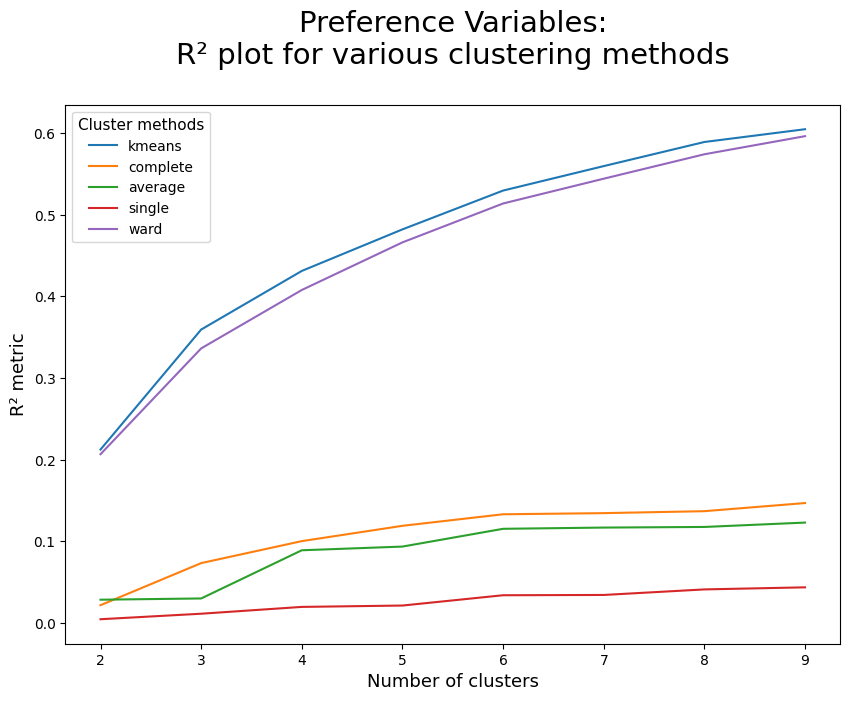

In [152]:
plot_r2_scores(pref_st_r2_scores)

### MinMax Scaler 
<a id='cmc-mm'></a>

In [153]:
pref_mm_r2_scores = get_r2_df(sample_mm_scl, preference_metrics_no_meat, kmeans, hierarchical)
pref_mm_r2_scores

,kmeans,complete,average,single,ward
2,0.366843,0.007898,0.001357,0.000934,0.361309
3,0.485880,0.015899,0.004283,0.001549,0.478966
4,0.560827,0.019726,0.004706,0.002655,0.551478
5,0.605063,0.023583,0.005322,0.004012,0.593691
6,0.633831,0.029649,0.015166,0.005291,0.617037
7,0.659799,0.036700,0.016747,0.005400,0.637697
8,0.678911,0.039833,0.017055,0.005996,0.653603
9,0.692805,0.040991,0.024144,0.006691,0.668045


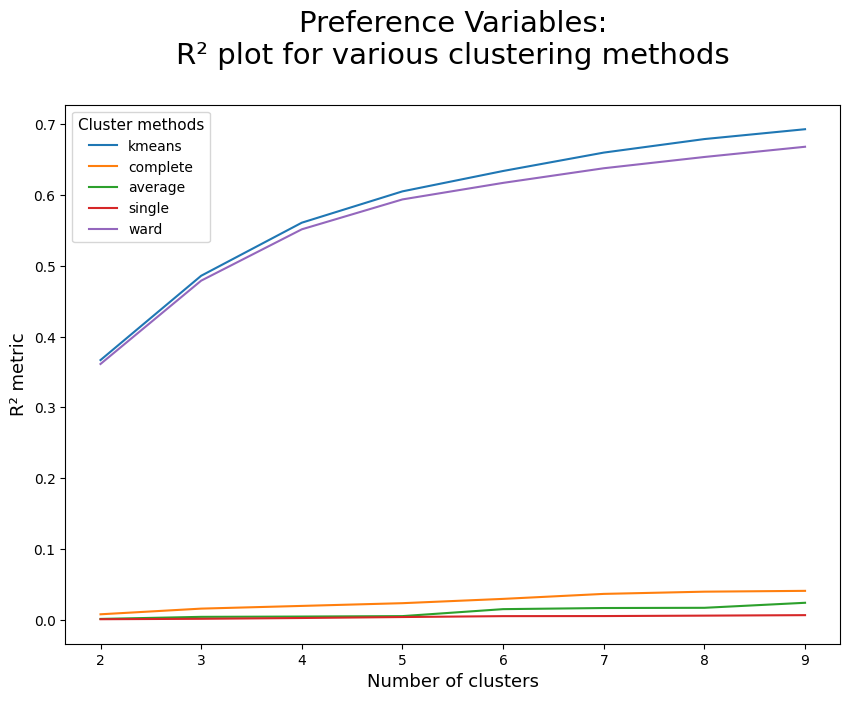

In [154]:
plot_r2_scores(pref_mm_r2_scores)

### Robust Scaler <a id='cmc-rb'></a>

In [155]:
pref_rb_r2_scores = get_r2_df(sample_rb_scl, preference_metrics_no_meat, kmeans, hierarchical)
pref_rb_r2_scores

,kmeans,complete,average,single,ward
2,0.268346,0.172522,0.176463,0.003801,0.258333
3,0.474346,0.250696,0.182638,0.013902,0.461066
4,0.547651,0.265994,0.197922,0.015340,0.532315
5,0.597450,0.277462,0.263349,0.019725,0.580537
6,0.643007,0.289936,0.264793,0.021929,0.625180
7,0.683179,0.308666,0.265548,0.194475,0.662300
8,0.703412,0.311524,0.279019,0.202754,0.687147
9,0.717732,0.322519,0.285649,0.210066,0.702257


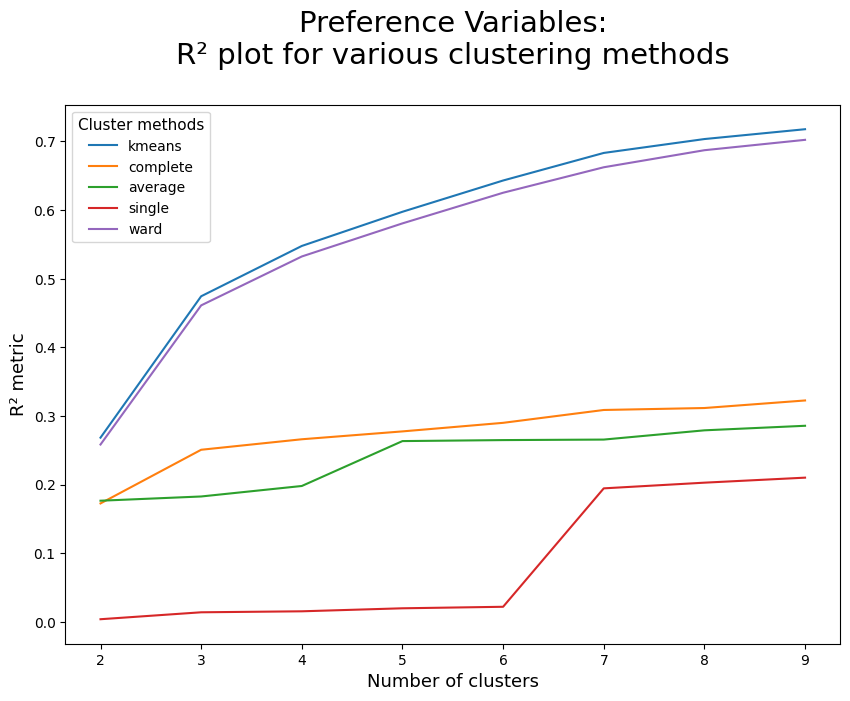

In [156]:
plot_r2_scores(pref_rb_r2_scores)

### Conclusions
<a id='cmc-c'></a>

With this analysis we can confidently focus on using kmeans and hierarchical clustering with ward linkeage to conduct our analysis, as these were shown to  consistently give better results for all types of scaled data. The deminished performances for complete, average and single linkeage hierarchical methods were especially significant for the data with unscaled data or with the standard or minmax scaler applied; however for the robust scaled data, k-means and ward hierarchical clustering were still the ones that provided better results by far.

It is also possible to see that solutions with 3 to 6 clusters will likely yeild the best results, as it is mostly where the graphs present more significant changes in the slope. Additionally, a comparison among scaler results with these preselected clustering techniques was performed.

In [158]:
# Prefix the names of the columns
df_no_prefixed = pref_no_r2_scores.add_prefix("no_")
df_st_prefixed = pref_st_r2_scores.add_prefix("st_")
df_mm_prefixed = pref_mm_r2_scores.add_prefix("mm_")
df_rb_prefixed = pref_rb_r2_scores.add_prefix("rb_")

# Concatenate the dataframes
df_combined = pd.concat([df_no_prefixed, df_st_prefixed, df_mm_prefixed, df_rb_prefixed], axis=1)

# Filter ward and kmeans columns
filtered_columns = [col for col in df_combined.columns if 'ward' in col or 'kmeans' in col]

# Create a new dataframe with only the filtered columns
df_filtered = df_combined[filtered_columns]
df_filtered


,no_kmeans,no_ward,st_kmeans,st_ward,mm_kmeans,mm_ward,rb_kmeans,rb_ward
2,0.265066,0.255768,0.212404,0.206698,0.366843,0.361309,0.268346,0.258333
3,0.432291,0.414827,0.359409,0.336325,0.485880,0.478966,0.474346,0.461066
4,0.506018,0.489387,0.431247,0.407892,0.560827,0.551478,0.547651,0.532315
5,0.569350,0.548995,0.482154,0.466233,0.605063,0.593691,0.597450,0.580537
6,0.611962,0.590121,0.529707,0.513878,0.633831,0.617037,0.643007,0.625180
7,0.640593,0.622783,0.559693,0.544266,0.659799,0.637697,0.683179,0.662300
8,0.667119,0.648697,0.589227,0.574182,0.678911,0.653603,0.703412,0.687147
9,0.687110,0.672364,0.604869,0.596359,0.692805,0.668045,0.717732,0.702257


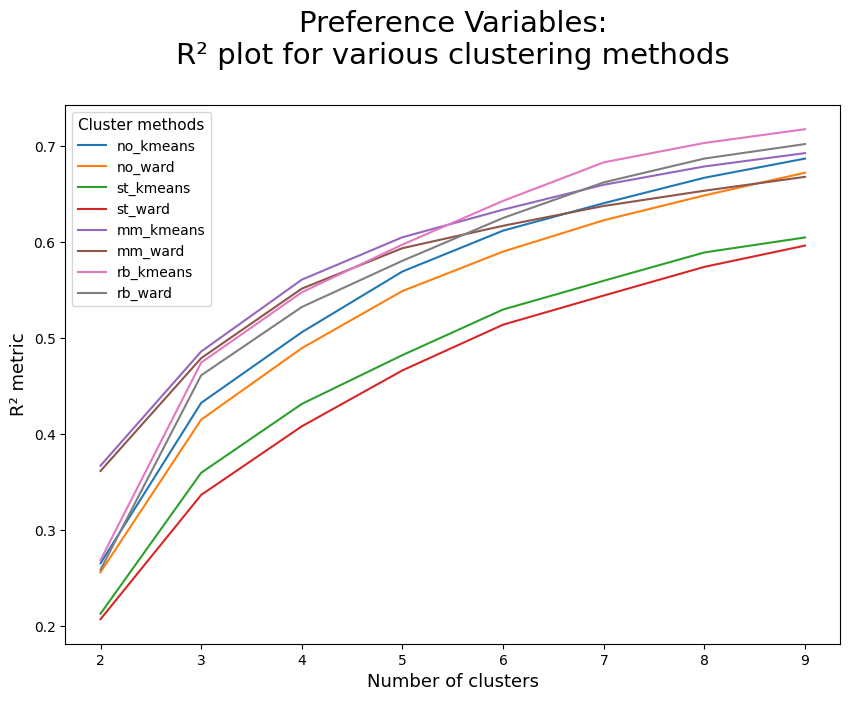

In [159]:
plot_r2_scores(df_filtered)

From the graph it is possible to conclude that for a **lower number of clusters**, **minmax scaler** is likely to provide better results followed by robust scaler, unscaled data, and standard scaler (in this order). Nonetheless, for **higher number of clusters**, **robust** will likely tend to outperform all other scalers. For clustering solutions with more than 6 clusters, the results with the unscaled data might even outperform the results where the minmax scaler was applied. **Standard scaler** is likely to be the one that consistently gives **worse results**. Having this said, all scaling methods were still tested.

# 4. Clustering
<a id='cl'></a>

In the notebook, the cluster analysis is grouped by data inputs - no scaling, standard scaler, minmax scaler, robust scaler. In each group, several methods of clustering were used and are presented in this order:
1. [KMeans](#km)
2. [Ward (Hierarchical)](#wh)
3. [DBScan](#dbs)

In the end, it was possible to identify groups that recurrently appeared in the clustering solutions, and based on this, solutions were chosen to be further studied.

## 4.1. K-means <a id='km'></a>

In this section, the k-means algorithm was tested with the data inputs previously mentioned. For each of the data inputs inertia and silhuette plots were done in order to decide which number of cluester were going to be considered for testing. Then, the clusters formed were analysed and clustering solutions compared. The tests for each data input were presented in the following order:
1. [No Scaler](#km-no)
2. [Standard Scaler](#km-st)
3. [MinMax Scaler](#km-mm)
4. [Robust Scaler](#km-rb)

### No Scaler <a id='km-no'></a>

#### Plot

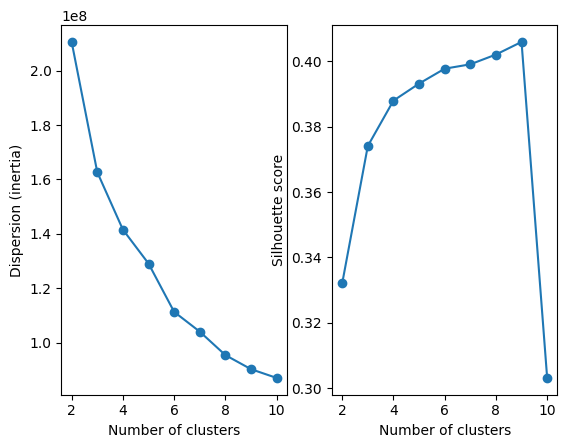

In [93]:
plot_inertia_and_silhouette(sample_no_scl, 2, 10)

#### Models

##### 3 clusters

In [95]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20,  random_state = 1).fit(sample_no_scl)
sample_original['no_kmeans3'] = kmeans.predict(sample_no_scl)

In [97]:
groupby_mean(sample_original, 'no_kmeans3', True)

# observations per cluster: [8793, 7949, 7684]


no_kmeans3,0,1,2
beer,46.310000,84.480000,45.400000
bottled_water,44.880000,83.290000,44.930000
bread,31.280000,30.620000,21.870000
meat,3.100000,2.270000,1.190000
dairy,31.870000,31.600000,77.630000
fresh_foods,109.590000,33.960000,32.370000
frozen_foods,65.830000,113.260000,31.990000
fruit_beverages,96.720000,21.590000,20.570000
pastry,62.410000,31.450000,55.100000
sodas,35.680000,34.620000,33.400000


fresh+beverage+(frozen+pastry) | beer+water+frozen | dairy+pastry

##### 4 clusters

In [98]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20,  random_state = 1).fit(sample_no_scl)
sample_original['no_kmeans4'] = kmeans.predict(sample_no_scl)

In [99]:
groupby_mean(sample_original, 'no_kmeans4', True)

# observations per cluster: [3869, 7850, 5043, 7664]


no_kmeans4,0,1,2,3
beer,48.620000,84.280000,45.620000,45.390000
bottled_water,45.770000,83.460000,44.700000,44.920000
bread,33.380000,30.270000,30.200000,21.840000
meat,7.330000,1.360000,1.380000,1.100000
dairy,35.830000,30.770000,30.450000,77.530000
fresh_foods,111.000000,32.920000,108.480000,32.280000
frozen_foods,117.270000,110.580000,31.390000,31.950000
fruit_beverages,98.250000,20.820000,95.120000,20.460000
pastry,32.520000,31.320000,85.360000,54.800000
sodas,40.420000,33.460000,33.950000,33.320000


fresh+beverage+frozen | beer+water+frozen | fresh+beverage+pastry | dairy+(pastry)

##### 6 clusters

In [102]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=20,  random_state = 1).fit(sample_no_scl)
sample_original['no_kmeans6'] = kmeans.predict(sample_no_scl)

In [103]:
groupby_mean(sample_original, 'no_kmeans6', True)

# observations per cluster: [2278, 7836, 3268, 5497, 113, 5434]


no_kmeans6,0,1,2,3,4,5
beer,45.940000,84.280000,45.630000,46.300000,118.700000,45.180000
bottled_water,45.240000,83.520000,44.650000,45.090000,57.960000,44.910000
bread,30.020000,30.330000,30.300000,30.920000,97.500000,18.480000
meat,1.180000,1.430000,1.870000,2.150000,149.770000,1.020000
dairy,60.930000,30.610000,30.460000,31.220000,201.700000,83.790000
fresh_foods,32.120000,33.160000,109.110000,108.810000,162.590000,32.430000
frozen_foods,32.740000,110.860000,32.520000,84.700000,314.670000,32.060000
fruit_beverages,20.540000,20.920000,95.540000,96.740000,124.030000,20.500000
pastry,114.540000,31.070000,114.290000,31.190000,53.550000,30.680000
sodas,32.850000,32.970000,34.540000,33.860000,317.520000,32.680000


pastry+(dairy) | beer+water+frozen | pastry+fresh+beverage | fresh+beverage+(frozen) | spenders(frozen+sodas) | dairy

#### Comparison

In [106]:
clusters_comparison(sample_original, 'no_kmeans4', 'no_kmeans3')

,no_kmeans3 0 Cluster,no_kmeans3 1 Cluster,no_kmeans3 2 Cluster
no_kmeans4 0 Cluster,3765,100,4
no_kmeans4 1 Cluster,2,7848,0
no_kmeans4 2 Cluster,5021,0,22
no_kmeans4 3 Cluster,5,1,7658


In [107]:
clusters_comparison(sample_original, 'no_kmeans6', 'no_kmeans4')

,no_kmeans4 0 Cluster,no_kmeans4 1 Cluster,no_kmeans4 2 Cluster,no_kmeans4 3 Cluster
no_kmeans6 0 Cluster,3,18,29,2228
no_kmeans6 1 Cluster,30,7806,0,0
no_kmeans6 2 Cluster,15,0,3253,0
no_kmeans6 3 Cluster,3733,2,1758,4
no_kmeans6 4 Cluster,87,14,1,11
no_kmeans6 5 Cluster,1,10,2,5421


### Standard Scaler <a id='km-st'></a>

#### Plot

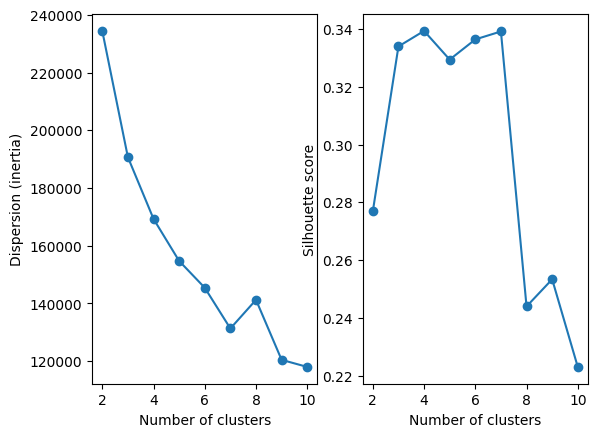

In [108]:
plot_inertia_and_silhouette(sample_st_scl, 2, 10)

#### Models

##### 3 clusters

In [111]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20,  random_state = 1).fit(sample_st_scl)
sample_original['st_kmeans3'] = kmeans.predict(sample_st_scl)

In [112]:
groupby_mean(sample_original, 'st_kmeans3', True)

# observations per cluster: [7858, 8806, 7762]


st_kmeans3,0,1,2
beer,85.440000,45.820000,45.450000
bottled_water,83.920000,44.730000,44.910000
bread,30.810000,31.210000,21.840000
meat,2.150000,2.820000,1.630000
dairy,31.150000,31.330000,78.240000
fresh_foods,34.210000,108.980000,32.700000
frozen_foods,112.430000,65.910000,33.640000
fruit_beverages,21.800000,96.210000,20.820000
pastry,31.500000,62.730000,54.390000
sodas,34.570000,35.330000,33.870000


beer+water+frozen | fresh+beverage+(frozen+pastry) | dairy+pastry

##### 4 clusters

In [113]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20,  random_state = 1).fit(sample_st_scl)
sample_original['st_kmeans4'] = kmeans.predict(sample_st_scl)

In [114]:
groupby_mean(sample_original, 'st_kmeans4', True)

# observations per cluster: [7836, 7751, 8767, 72]


st_kmeans4,0,1,2,3
beer,85.200000,45.350000,45.590000,122.760000
bottled_water,83.950000,44.900000,44.710000,57.220000
bread,30.250000,21.770000,30.250000,215.210000
meat,1.630000,1.320000,1.830000,213.260000
dairy,30.800000,77.540000,30.710000,226.690000
fresh_foods,34.020000,32.500000,108.420000,185.460000
frozen_foods,112.070000,33.410000,65.140000,232.220000
fruit_beverages,21.640000,20.650000,95.870000,139.080000
pastry,31.460000,54.420000,62.700000,56.600000
sodas,33.640000,33.160000,34.290000,338.440000


beer+water+frozen | dairy+pastry | fresh+beverage+(frozen+pastry) | spenders(sodas)

##### 7 clusters

In [115]:
kmeans = KMeans(n_clusters = 7, init='k-means++', n_init=20,  random_state = 1).fit(sample_st_scl)
sample_original['st_kmeans7'] = kmeans.predict(sample_st_scl)

In [116]:
groupby_mean(sample_original, 'st_kmeans7', True)

# observations per cluster: [4251, 7799, 5482, 4270, 2540, 39, 45]


st_kmeans7,0,1,2,3,4,5,6
beer,45.460000,85.200000,45.730000,45.120000,45.940000,102.540000,128.870000
bottled_water,44.700000,83.980000,44.800000,44.790000,45.370000,57.260000,58.380000
bread,29.890000,30.200000,30.400000,16.220000,28.420000,317.330000,75.090000
meat,1.390000,1.450000,2.070000,1.190000,1.750000,173.820000,212.000000
dairy,31.130000,30.640000,30.910000,83.100000,83.940000,64.080000,370.180000
fresh_foods,90.230000,33.820000,108.950000,31.960000,34.120000,148.590000,196.220000
frozen_foods,32.710000,111.610000,85.000000,33.560000,34.340000,155.850000,287.600000
fruit_beverages,77.470000,21.400000,96.810000,20.540000,21.500000,102.210000,151.710000
pastry,114.880000,31.220000,31.350000,36.790000,61.650000,49.440000,63.160000
sodas,34.060000,33.340000,34.190000,33.090000,32.740000,194.440000,473.820000


pastry+(fresh+beverage) | beer+water+frozen | fresh+beverage+(frozen) | dairy | dairy+(pastry)+veggies+wines | spenders(bread) | spenders(sodas)

#### Comparison

In [119]:
clusters_comparison(sample_original, 'st_kmeans4', 'st_kmeans3')

,st_kmeans3 0 Cluster,st_kmeans3 1 Cluster,st_kmeans3 2 Cluster
st_kmeans4 0 Cluster,7836,0,0
st_kmeans4 1 Cluster,0,1,7750
st_kmeans4 2 Cluster,0,8767,0
st_kmeans4 3 Cluster,22,38,12


In [122]:
clusters_comparison(sample_original, 'st_kmeans7', 'st_kmeans4')

,st_kmeans4 0 Cluster,st_kmeans4 1 Cluster,st_kmeans4 2 Cluster,st_kmeans4 3 Cluster
st_kmeans7 0 Cluster,7,955,3289,0
st_kmeans7 1 Cluster,7793,5,0,1
st_kmeans7 2 Cluster,14,9,5458,1
st_kmeans7 3 Cluster,2,4268,0,0
st_kmeans7 4 Cluster,15,2506,19,0
st_kmeans7 5 Cluster,0,0,0,39
st_kmeans7 6 Cluster,5,8,1,31


### MinMax Scaler <a id='km-mm'></a>

#### Plot

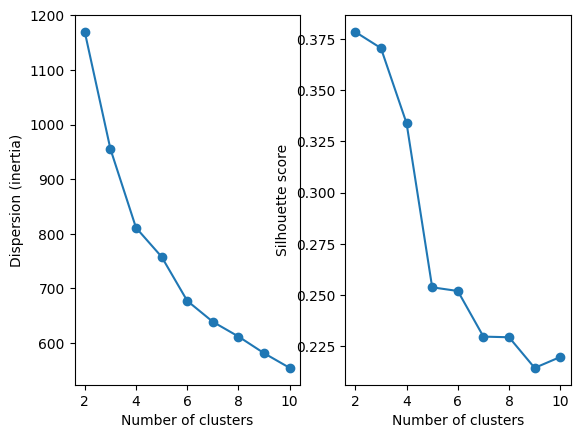

In [109]:
plot_inertia_and_silhouette(sample_mm_scl, 2, 10)

#### Models

##### 3 clusters

In [208]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20,  random_state = 1).fit(sample_mm_scl)
sample_original['mm_kmeans3'] = kmeans.predict(sample_mm_scl)

In [209]:
groupby_mean(sample_original, 'mm_kmeans3', True)

# observations per cluster: [7783, 7842, 8801]


mm_kmeans3,0,1,2
beer,45.440000,84.900000,46.380000
bottled_water,44.810000,84.220000,44.620000
bread,22.030000,30.700000,31.170000
meat,1.280000,2.060000,3.210000
dairy,76.910000,31.220000,32.330000
fresh_foods,32.480000,34.220000,109.210000
frozen_foods,33.860000,111.290000,66.880000
fruit_beverages,20.700000,21.680000,96.460000
pastry,54.530000,31.550000,62.530000
sodas,33.290000,34.460000,35.940000


dairy+(pastry) | beer+water+frozen | fresh+beverage+(frozen+pastry)

##### 4 clusters

In [123]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20,  random_state = 1).fit(sample_mm_scl)
sample_original['mm_kmeans4'] = kmeans.predict(sample_mm_scl)

In [124]:
groupby_mean(sample_original, 'mm_kmeans4', True)

# observations per cluster: [5232, 7828, 8723, 2643]


mm_kmeans4,0,1,2,3
beer,45.350000,84.930000,46.260000,46.150000
bottled_water,44.720000,84.240000,44.610000,45.170000
bread,19.200000,30.680000,31.100000,28.200000
meat,1.170000,2.020000,3.040000,2.240000
dairy,73.410000,31.140000,32.050000,83.420000
fresh_foods,32.040000,34.160000,109.480000,34.910000
frozen_foods,33.820000,111.230000,66.780000,35.880000
fruit_beverages,20.490000,21.660000,96.810000,22.280000
pastry,52.450000,31.470000,62.310000,59.720000
sodas,33.760000,34.360000,35.650000,33.670000


dairy+pastry | beer+water+frozen | fresh+beverage+(frozen+pastry) | dairy+pastry+veggies+wines

##### 5 clusters

In [127]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init=20,  random_state = 1).fit(sample_mm_scl)
sample_original['mm_kmeans5'] = kmeans.predict(sample_mm_scl)

In [128]:
groupby_mean(sample_original, 'mm_kmeans5', True)

# observations per cluster: [3934, 7825, 4429, 2619, 5619]


mm_kmeans5,0,1,2,3,4
beer,45.750000,84.930000,45.230000,46.030000,46.660000
bottled_water,44.600000,84.240000,44.730000,45.150000,44.650000
bread,30.190000,30.620000,17.190000,28.060000,31.760000
meat,1.780000,2.020000,1.160000,2.070000,3.740000
dairy,32.540000,31.150000,79.680000,83.340000,32.930000
fresh_foods,93.050000,34.130000,31.680000,34.410000,110.120000
frozen_foods,33.480000,111.210000,34.140000,35.410000,85.250000
fruit_beverages,80.370000,21.660000,20.250000,21.830000,97.460000
pastry,114.890000,31.400000,40.890000,59.820000,33.220000
sodas,34.550000,34.360000,33.940000,32.950000,36.340000


pastry+(fresh+beverage) | beer+water+frozen | dairy | dairy+(pastry)+veggies+wines | fresh+beverage+(frozen)

##### 6 clusters

In [125]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=20,  random_state = 1).fit(sample_mm_scl)
sample_original['mm_kmeans6'] = kmeans.predict(sample_mm_scl)

In [126]:
groupby_mean(sample_original, 'mm_kmeans6', True)

# observations per cluster: [5619, 4069, 3764, 2616, 4426, 3932]


mm_kmeans6,0,1,2,3,4,5
beer,46.640000,84.930000,84.890000,46.020000,45.230000,45.740000
bottled_water,44.650000,84.400000,84.030000,45.130000,44.720000,44.600000
bread,31.700000,30.260000,31.120000,28.040000,17.180000,30.190000
meat,3.720000,1.600000,2.540000,2.030000,1.160000,1.780000
dairy,32.930000,31.040000,31.330000,83.360000,79.680000,32.540000
fresh_foods,110.070000,34.120000,34.260000,34.410000,31.640000,93.070000
frozen_foods,85.240000,111.010000,111.420000,35.340000,34.090000,33.460000
fruit_beverages,97.460000,21.670000,21.660000,21.810000,20.250000,80.380000
pastry,33.230000,31.390000,31.530000,59.830000,40.870000,114.850000
sodas,36.320000,34.160000,34.630000,32.930000,33.940000,34.550000


fresh+beverage+(frozen) | beer+water+frozen | beer+water+frozen+(toiletries) | dairy+(pastry)+veggies+wines | dairy | pastry+(fresh+beverage)

#### Comparison

In [215]:
clusters_comparison(sample_original, 'mm_kmeans4', 'mm_kmeans3')

,mm_kmeans3 0 Cluster,mm_kmeans3 1 Cluster,mm_kmeans3 2 Cluster
mm_kmeans4 0 Cluster,5171,1,60
mm_kmeans4 1 Cluster,0,7828,0
mm_kmeans4 2 Cluster,3,0,8720
mm_kmeans4 3 Cluster,2609,13,21


In [130]:
clusters_comparison(sample_original, 'mm_kmeans5', 'mm_kmeans4')

,mm_kmeans4 0 Cluster,mm_kmeans4 1 Cluster,mm_kmeans4 2 Cluster,mm_kmeans4 3 Cluster
mm_kmeans5 0 Cluster,799,2,3119,14
mm_kmeans5 1 Cluster,0,7825,0,0
mm_kmeans5 2 Cluster,4399,0,0,30
mm_kmeans5 3 Cluster,28,0,0,2591
mm_kmeans5 4 Cluster,6,1,5604,8


In [135]:
clusters_comparison(sample_original, 'mm_kmeans6', 'mm_kmeans5')

,mm_kmeans5 0 Cluster,mm_kmeans5 1 Cluster,mm_kmeans5 2 Cluster,mm_kmeans5 3 Cluster,mm_kmeans5 4 Cluster
mm_kmeans6 0 Cluster,1,1,0,0,5617
mm_kmeans6 1 Cluster,1,4067,1,0,0
mm_kmeans6 2 Cluster,0,3757,2,3,2
mm_kmeans6 3 Cluster,0,0,0,2616,0
mm_kmeans6 4 Cluster,0,0,4426,0,0
mm_kmeans6 5 Cluster,3932,0,0,0,0


### Robust Scaler <a id='km-rb'></a>

#### Plot

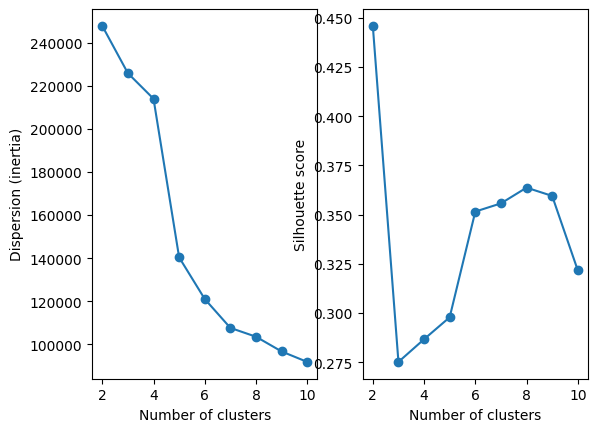

In [110]:
plot_inertia_and_silhouette(sample_rb_scl, 2, 10)

#### Models

##### 3 clusters

In [136]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20,  random_state = 1).fit(sample_rb_scl)
sample_original['rb_kmeans3'] = kmeans.predict(sample_rb_scl)

In [137]:
groupby_mean(sample_original, 'rb_kmeans3', True)

# observations per cluster: [18743, 5636, 47]


rb_kmeans3,0,1,2
beer,61.970000,46.320000,108.020000
bottled_water,61.070000,45.180000,57.940000
bread,26.830000,30.090000,296.980000
meat,1.860000,2.020000,172.400000
dairy,46.850000,43.420000,106.890000
fresh_foods,55.340000,77.590000,167.700000
frozen_foods,80.800000,35.750000,192.450000
fruit_beverages,43.100000,65.060000,118.490000
pastry,30.630000,114.500000,56.110000
sodas,34.070000,34.840000,227.830000


general(beer+water+frozen) | pastry+(fresh+beverage) | spenders(bread+(sodas))

##### 5 clusters

In [139]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init=20,  random_state = 1).fit(sample_rb_scl)
sample_original['rb_kmeans5'] = kmeans.predict(sample_rb_scl)

In [140]:
groupby_mean(sample_original, 'rb_kmeans5', True)

# observations per cluster: [967, 4212, 5602, 44, 13601]


rb_kmeans5,0,1,2,3,4
beer,53.190000,45.120000,46.230000,110.200000,67.810000
bottled_water,49.090000,44.750000,45.120000,56.800000,66.960000
bread,31.070000,14.910000,30.040000,305.800000,30.280000
meat,4.780000,1.160000,1.990000,184.020000,1.880000
dairy,82.010000,83.930000,43.290000,112.070000,32.920000
fresh_foods,48.110000,32.710000,77.320000,173.200000,63.030000
frozen_foods,49.700000,32.420000,35.490000,192.300000,98.010000
fruit_beverages,31.390000,21.110000,64.970000,123.430000,50.840000
pastry,34.310000,30.670000,114.460000,57.480000,30.590000
sodas,43.160000,33.400000,34.620000,241.980000,33.720000


veggies+dairy+wines | dairy | pastry+(fresh+beverage) | spenders(bread+(sodas)) | beer+water+frozen+(fresh+beverage)

##### 6 clusters

In [141]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=20,  random_state = 1).fit(sample_rb_scl)
sample_original['rb_kmeans6'] = kmeans.predict(sample_rb_scl)

In [142]:
groupby_mean(sample_original, 'rb_kmeans6', True)

# observations per cluster: [4250, 8116, 5472, 5593, 44, 951]


rb_kmeans6,0,1,2,3,4,5
beer,45.130000,82.890000,45.640000,46.220000,110.200000,52.550000
bottled_water,44.750000,82.000000,44.760000,45.120000,56.800000,48.830000
bread,15.060000,30.210000,30.400000,30.040000,305.800000,30.990000
meat,1.210000,1.560000,2.340000,1.990000,184.020000,4.730000
dairy,84.190000,33.390000,31.650000,43.310000,112.070000,82.850000
fresh_foods,32.330000,33.410000,107.650000,77.270000,173.200000,47.210000
frozen_foods,32.450000,107.600000,84.240000,35.430000,192.300000,48.560000
fruit_beverages,20.790000,21.270000,95.350000,64.890000,123.430000,30.510000
pastry,30.660000,30.580000,30.680000,114.520000,57.480000,34.360000
sodas,33.440000,33.320000,34.340000,34.600000,241.980000,43.110000


dairy | beer+water+frozen | fresh+beverage+(frozen) | pastry+(fresh+beverage) | spenders(bread+(sodas)) | veggies+dairy+wines

#### Comparison

In [144]:
clusters_comparison(sample_original, 'rb_kmeans5', 'rb_kmeans3')

,rb_kmeans3 0 Cluster,rb_kmeans3 1 Cluster,rb_kmeans3 2 Cluster
rb_kmeans5 0 Cluster,934,31,2
rb_kmeans5 1 Cluster,4208,4,0
rb_kmeans5 2 Cluster,2,5600,0
rb_kmeans5 3 Cluster,0,0,44
rb_kmeans5 4 Cluster,13599,1,1


In [145]:
clusters_comparison(sample_original, 'rb_kmeans6', 'rb_kmeans5')

,rb_kmeans5 0 Cluster,rb_kmeans5 1 Cluster,rb_kmeans5 2 Cluster,rb_kmeans5 3 Cluster,rb_kmeans5 4 Cluster
rb_kmeans6 0 Cluster,0,4188,0,0,62
rb_kmeans6 1 Cluster,9,3,1,0,8103
rb_kmeans6 2 Cluster,9,21,8,0,5434
rb_kmeans6 3 Cluster,0,0,5593,0,0
rb_kmeans6 4 Cluster,0,0,0,44,0
rb_kmeans6 5 Cluster,949,0,0,0,2


## 4.2. Hierarchical (Ward) <a id='wh'></a>

In this section, the hierarchical algorithm with a ward linkeage method was tested with the data inputs previously mentioned. For each of the data inputs dendrograms were plotted in order to decide which number of cluester were going to be considered for testing. Then, the clusters formed were analysed and clustering solutions compared. The tests for each data input were presented in the following order:
1. [No Scaler](#h-no)
2. [Standard Scaler](#h-st)
3. [MinMax Scaler](#h-mm)
4. [Robust Scaler](#h-rb)

In the end of this section there is also a result comparison between clustering techniques as well as scaling options.

5. [Inter Clustering Comparison](#icc)

### No Scaler <a id='h-no'></a>

#### Plot

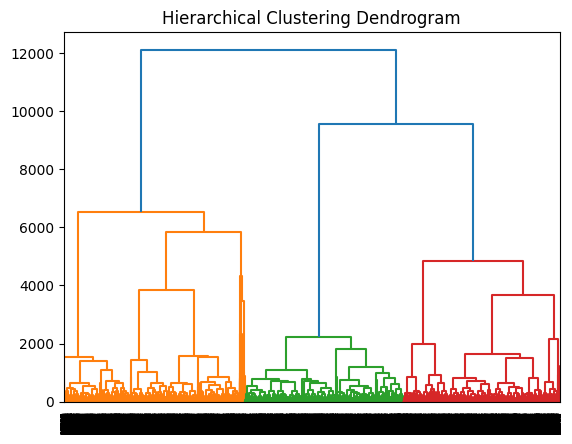

In [20]:
plot_dendrogram(sample_no_scl, 'ward')

#### Models

##### 3 clusters

In [58]:
sample_original['no_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_no_scl)

In [59]:
groupby_mean(sample_original, 'no_ward3', True)

# observations per cluster: [8959, 7660, 7807]


no_ward3,0,1,2
beer,47.060000,45.350000,84.370000
bottled_water,45.330000,45.010000,83.390000
bread,31.860000,21.760000,30.010000
meat,4.340000,0.920000,1.080000
dairy,33.830000,76.520000,30.580000
fresh_foods,108.420000,32.770000,33.300000
frozen_foods,69.580000,32.210000,109.500000
fruit_beverages,95.620000,20.750000,21.070000
pastry,62.500000,54.670000,31.170000
sodas,38.300000,32.490000,32.480000


fresh+beverage+(frozen+pastry) | dairy+(pastry) | beer+water+frozen

##### 5 clusters

In [64]:
sample_original['no_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_no_scl)

In [65]:
groupby_mean(sample_original, 'no_ward5', True)

# observations per cluster: [7660, 267, 7807, 3289, 5403]


no_ward5,0,1,2,3,4
beer,45.350000,90.190000,84.370000,45.480000,45.880000
bottled_water,45.010000,60.440000,83.390000,44.740000,44.940000
bread,21.760000,83.550000,30.010000,30.070000,30.410000
meat,0.920000,92.350000,1.080000,1.680000,1.610000
dairy,76.520000,130.370000,30.580000,30.920000,30.830000
fresh_foods,32.770000,122.210000,33.300000,106.970000,108.620000
frozen_foods,32.210000,249.930000,109.500000,33.850000,82.420000
fruit_beverages,20.750000,89.160000,21.070000,94.270000,96.760000
pastry,54.670000,50.460000,31.170000,115.250000,30.990000
sodas,32.490000,186.060000,32.480000,33.940000,33.660000


dairy+(pastry) | spenders(frozen+sodas) | beer+water+frozen | pastry+fresh+beverage | fresh+beverage+(frozen)

#### Comparison

In [67]:
clusters_comparison(sample_original, 'no_ward5', 'no_ward3')

,no_ward3 0 Cluster,no_ward3 1 Cluster,no_ward3 2 Cluster
no_ward5 0 Cluster,0,7660,0
no_ward5 1 Cluster,267,0,0
no_ward5 2 Cluster,0,0,7807
no_ward5 3 Cluster,3289,0,0
no_ward5 4 Cluster,5403,0,0


### Standard Scaler <a id='h-st'></a>

#### Plot

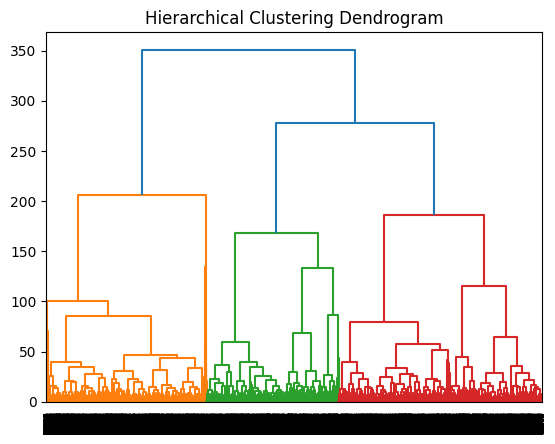

In [21]:
plot_dendrogram(sample_st_scl, 'ward')

#### Models

##### 3 clusters

In [68]:
sample_original['st_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_st_scl)

In [69]:
groupby_mean(sample_original, 'st_ward3', True)

# observations per cluster: [7904, 10000, 6522]


st_ward3,0,1,2
beer,85.510000,45.430000,45.610000
bottled_water,83.540000,44.730000,45.120000
bread,31.840000,30.110000,20.490000
meat,3.560000,1.770000,1.310000
dairy,33.260000,32.760000,82.410000
fresh_foods,35.740000,97.740000,34.110000
frozen_foods,112.290000,60.960000,34.930000
fruit_beverages,23.250000,85.510000,21.650000
pastry,31.730000,69.390000,42.530000
sodas,37.120000,33.830000,32.800000


beer+water+frozen | fresh+beverage+(frozen+pastry) | dairy

##### 4 clusters

In [239]:
sample_original['st_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_st_scl)

In [240]:
groupby_mean(sample_original, 'st_ward4', True)

# observations per cluster: [10000, 71, 6522, 7833]


st_ward4,0,1,2,3
beer,45.430000,116.030000,45.610000,85.230000
bottled_water,44.730000,59.310000,45.120000,83.760000
bread,30.110000,221.100000,20.490000,30.130000
meat,1.770000,201.390000,1.310000,1.770000
dairy,32.760000,210.100000,82.410000,31.660000
fresh_foods,97.740000,167.460000,34.110000,34.540000
frozen_foods,60.960000,237.490000,34.930000,111.150000
fruit_beverages,85.510000,125.660000,21.650000,22.320000
pastry,69.390000,52.300000,42.530000,31.540000
sodas,33.830000,320.590000,32.800000,34.550000


fresh+beverage+(frozen+pastry) | spenders | dairy+(pastry+veggies+wine) | beer+water+frozen

##### 6 clusters

In [70]:
sample_original['st_ward6'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 6
    ).fit_predict(sample_st_scl)

In [71]:
groupby_mean(sample_original, 'st_ward6', True)

# observations per cluster: [71, 2633, 4533, 7833, 5467, 3889]


st_ward6,0,1,2,3,4,5
beer,116.030000,46.370000,45.180000,85.230000,45.630000,45.100000
bottled_water,59.310000,45.390000,44.580000,83.760000,44.860000,44.940000
bread,221.100000,27.990000,29.670000,30.130000,30.480000,15.420000
meat,201.390000,1.620000,1.080000,1.770000,2.340000,1.100000
dairy,210.100000,82.710000,34.800000,31.660000,31.070000,82.200000
fresh_foods,167.460000,36.470000,84.760000,34.540000,108.500000,32.520000
frozen_foods,237.490000,34.900000,32.340000,111.150000,84.700000,34.940000
fruit_beverages,125.660000,22.650000,72.570000,22.320000,96.240000,20.970000
pastry,52.300000,59.880000,114.540000,31.540000,31.960000,30.780000
sodas,320.590000,32.820000,33.020000,34.550000,34.500000,32.780000


spenders(sodas) | dairy+pastry+veggies+wines | pastry+(fruit+beverage) | beer+water+frozen | fresh+beverage+(frozen) | dairy

#### Comparison

In [72]:
clusters_comparison(sample_original, 'st_ward6', 'st_ward3')

,st_ward3 0 Cluster,st_ward3 1 Cluster,st_ward3 2 Cluster
st_ward6 0 Cluster,71,0,0
st_ward6 1 Cluster,0,0,2633
st_ward6 2 Cluster,0,4533,0
st_ward6 3 Cluster,7833,0,0
st_ward6 4 Cluster,0,5467,0
st_ward6 5 Cluster,0,0,3889


### MinMax Scaler <a id='h-mm'></a>

#### Plot

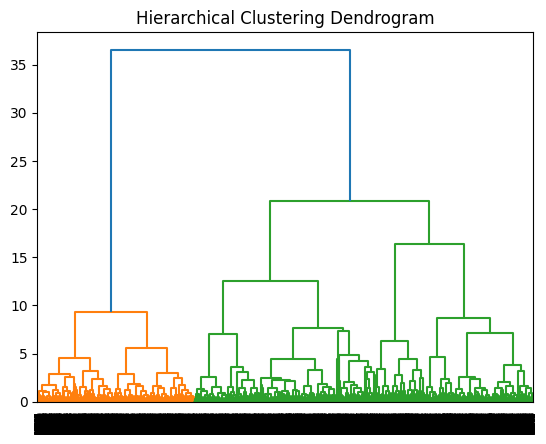

In [22]:
plot_dendrogram(sample_mm_scl, 'ward')

#### Models

##### 2 clusters

In [73]:
sample_original['mm_ward2'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 2
    ).fit_predict(sample_mm_scl)

In [74]:
groupby_mean(sample_original, 'mm_ward2', True)

# observations per cluster: [16666, 7760]


mm_ward2,0,1
beer,46.530000,84.040000
bottled_water,44.880000,84.270000
bread,27.160000,30.130000
meat,2.600000,1.430000
dairy,53.440000,30.580000
fresh_foods,73.330000,33.530000
frozen_foods,52.120000,110.350000
fruit_beverages,60.870000,21.350000
pastry,58.800000,31.200000
sodas,35.120000,33.540000


general | bee+water+frozen

##### 3 clusters

In [75]:
sample_original['mm_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_mm_scl)

In [76]:
groupby_mean(sample_original, 'mm_ward3', True)

# observations per cluster: [7797, 7760, 8869]


mm_ward3,0,1,2
beer,45.310000,84.040000,47.600000
bottled_water,44.870000,84.270000,44.880000
bread,21.960000,30.130000,31.730000
meat,1.210000,1.430000,3.820000
dairy,76.430000,30.580000,33.230000
fresh_foods,32.460000,33.530000,109.260000
frozen_foods,33.780000,110.350000,68.240000
fruit_beverages,20.570000,21.350000,96.300000
pastry,54.680000,31.200000,62.430000
sodas,32.830000,33.540000,37.140000


dairy+pastry | beer+water+frozen | fresh+beverage+(frozen+pastry)

##### 4 clusters

In [211]:
sample_original['mm_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_mm_scl)

In [212]:
groupby_mean(sample_original, 'mm_ward4', True)

# observations per cluster: [8869, 7760, 5284, 2513]


mm_ward4,0,1,2,3
beer,47.600000,84.040000,45.200000,45.540000
bottled_water,44.880000,84.270000,44.830000,44.960000
bread,31.730000,30.130000,19.350000,27.470000
meat,3.820000,1.430000,1.030000,1.580000
dairy,33.230000,30.580000,72.730000,84.210000
fresh_foods,109.260000,33.530000,32.330000,32.730000
frozen_foods,68.240000,110.350000,33.940000,33.450000
fruit_beverages,96.300000,21.350000,20.560000,20.580000
pastry,62.430000,31.200000,53.150000,57.890000
sodas,37.140000,33.540000,33.030000,32.420000


fresh+beverage+(frozen+pastry) | beer+water+frozen | dairy+(pastry) | dairy+(pastry)+veggies+wines

##### 5 clusters

In [77]:
sample_original['mm_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_mm_scl)

In [78]:
groupby_mean(sample_original, 'mm_ward5', True)

# observations per cluster: [7760, 5649, 5284, 2513, 3220]


mm_ward5,0,1,2,3,4
beer,84.040000,48.830000,45.200000,45.540000,45.440000
bottled_water,84.270000,45.030000,44.830000,44.960000,44.640000
bread,30.130000,32.800000,19.350000,27.470000,29.840000
meat,1.430000,5.150000,1.030000,1.580000,1.490000
dairy,30.580000,34.930000,72.730000,84.210000,30.240000
fresh_foods,33.530000,110.200000,32.330000,32.730000,107.610000
frozen_foods,110.350000,88.120000,33.940000,33.450000,33.370000
fruit_beverages,21.350000,96.940000,20.560000,20.580000,95.160000
pastry,31.200000,32.370000,53.150000,57.890000,115.170000
sodas,33.540000,39.040000,33.030000,32.420000,33.800000


beer+water+frozen | fresh+beverage+(frozen) | dairy+pastry | dairy+pastry+veggies+wine | pastry+fresh+beverage

#### Comparison

In [88]:
clusters_comparison(sample_original, 'mm_ward3', 'mm_ward2')

,mm_ward2 0 Cluster,mm_ward2 1 Cluster
mm_ward3 0 Cluster,7797,0
mm_ward3 1 Cluster,0,7760
mm_ward3 2 Cluster,8869,0


In [213]:
clusters_comparison(sample_original, 'mm_ward4', 'mm_ward3')

,mm_ward3 0 Cluster,mm_ward3 1 Cluster,mm_ward3 2 Cluster
mm_ward4 0 Cluster,0,0,8869
mm_ward4 1 Cluster,0,7760,0
mm_ward4 2 Cluster,5284,0,0
mm_ward4 3 Cluster,2513,0,0


In [214]:
clusters_comparison(sample_original, 'mm_ward5', 'mm_ward4')

,mm_ward4 0 Cluster,mm_ward4 1 Cluster,mm_ward4 2 Cluster,mm_ward4 3 Cluster
mm_ward5 0 Cluster,0,7760,0,0
mm_ward5 1 Cluster,5649,0,0,0
mm_ward5 2 Cluster,0,0,5284,0
mm_ward5 3 Cluster,0,0,0,2513
mm_ward5 4 Cluster,3220,0,0,0


### Robust Scaler <a id='h-rb'></a>

#### Plot

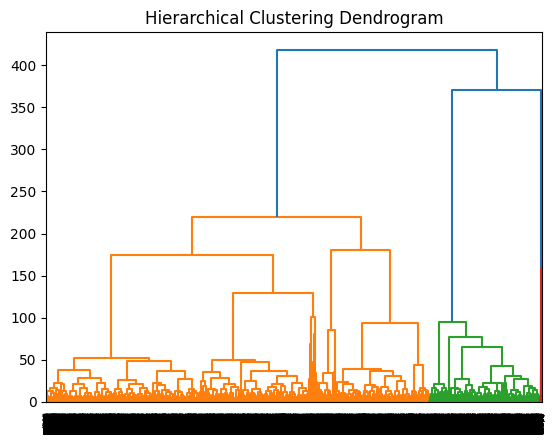

In [23]:
plot_dendrogram(sample_rb_scl, 'ward')

#### Models

##### 3 clusters

In [82]:
sample_original['rb_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_rb_scl)

In [83]:
groupby_mean(sample_original, 'rb_ward3', True)

# observations per cluster: [18894, 58, 5474]


rb_ward3,0,1,2
beer,61.950000,104.790000,45.850000
bottled_water,60.950000,58.000000,45.100000
bread,26.950000,267.140000,29.570000
meat,2.060000,162.810000,1.100000
dairy,46.930000,126.810000,42.730000
fresh_foods,55.790000,162.900000,76.510000
frozen_foods,80.870000,210.830000,33.770000
fruit_beverages,43.440000,124.100000,64.340000
pastry,31.310000,54.620000,114.600000
sodas,34.550000,213.640000,32.950000


general(beer+water+frozen) | spenders(bread+(frozen+sodas)) | pastry+(fresh+beverage)

##### 4 clusters

In [84]:
sample_original['rb_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_rb_scl)

In [85]:
groupby_mean(sample_original, 'rb_ward4', True)

# observations per cluster: [5551, 13343, 5474, 58]


rb_ward4,0,1,2,3
beer,45.820000,68.670000,45.850000,104.790000
bottled_water,45.440000,67.410000,45.100000,58.000000
bread,18.620000,30.410000,29.570000,267.140000
meat,1.100000,2.460000,1.100000,162.810000
dairy,82.550000,32.110000,42.730000,126.810000
fresh_foods,34.080000,64.820000,76.510000,162.900000
frozen_foods,34.050000,100.340000,33.770000,210.830000
fruit_beverages,21.330000,52.630000,64.340000,124.100000
pastry,31.190000,31.360000,114.600000,54.620000
sodas,32.900000,35.240000,32.950000,213.640000


dairy | beer+water+frozen+(fresh+beverage) | pastry+(fresh+beverage) | spenders(bread+(frozen+sodas))

##### 6 clusters

In [86]:
sample_original['rb_ward6'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 6
    ).fit_predict(sample_rb_scl)

In [87]:
groupby_mean(sample_original, 'rb_ward6', True)

# observations per cluster: [58, 5795, 5474, 4662, 889, 7548]


rb_ward6,0,1,2,3,4,5
beer,104.790000,48.740000,45.850000,45.030000,49.950000,83.960000
bottled_water,58.000000,45.690000,45.100000,44.790000,48.840000,84.080000
bread,267.140000,31.350000,29.570000,16.490000,29.800000,29.690000
meat,162.810000,4.390000,1.100000,0.900000,2.140000,0.980000
dairy,126.810000,34.630000,42.730000,83.430000,77.940000,30.180000
fresh_foods,162.900000,106.500000,76.510000,32.230000,43.780000,32.820000
frozen_foods,210.830000,87.460000,33.770000,32.290000,43.270000,110.240000
fruit_beverages,124.100000,93.920000,64.340000,20.550000,25.400000,20.940000
pastry,54.620000,32.380000,114.600000,30.680000,33.900000,30.580000
sodas,213.640000,39.170000,32.950000,32.530000,34.840000,32.230000


spenders(bread+(frozen+sodas)) | fresh+beverage+(frozen) | fresh+beverage+(pastry) | dairy | dairy+veggies+wine | beer+water+frozen

#### Comparison

In [91]:
clusters_comparison(sample_original, 'rb_ward4', 'rb_ward3')

,rb_ward3 0 Cluster,rb_ward3 1 Cluster,rb_ward3 2 Cluster
rb_ward4 0 Cluster,5551,0,0
rb_ward4 1 Cluster,13343,0,0
rb_ward4 2 Cluster,0,0,5474
rb_ward4 3 Cluster,0,58,0


In [92]:
clusters_comparison(sample_original, 'rb_ward6', 'rb_ward4')

,rb_ward4 0 Cluster,rb_ward4 1 Cluster,rb_ward4 2 Cluster,rb_ward4 3 Cluster
rb_ward6 0 Cluster,0,0,0,58
rb_ward6 1 Cluster,0,5795,0,0
rb_ward6 2 Cluster,0,0,5474,0
rb_ward6 3 Cluster,4662,0,0,0
rb_ward6 4 Cluster,889,0,0,0
rb_ward6 5 Cluster,0,7548,0,0


### Inter clustering Comparison <a id='icc'></a>

#### Scaler Comparison
In this section it is possible understand that both **minmax** and **robust** scalers are the ones that presented more **consistent results**, in the sense that independently of the clustering method used (hierarchical with ward or kmeans), the clustering solutions were very similar and the observations belonging to the clusters formed also did not have a lot of variation.

The variations for the solutions built using the other scaling methods (unscaled data and standard scaler) was especially noticeable when the the clustering solution had more than 3 clusters.

##### No Scaler

In [232]:
clusters_comparison(sample_original, 'no_kmeans3', 'no_ward3')

,no_ward3 0 Cluster,no_ward3 1 Cluster,no_ward3 2 Cluster
no_kmeans3 0 Cluster,8713,54,26
no_kmeans3 1 Cluster,160,25,7764
no_kmeans3 2 Cluster,86,7581,17


In [233]:
clusters_comparison(sample_original, 'no_kmeans4', 'no_ward4')

,no_ward4 0 Cluster,no_ward4 1 Cluster,no_ward4 2 Cluster,no_ward4 3 Cluster
no_kmeans4 0 Cluster,3758,24,37,50
no_kmeans4 1 Cluster,75,24,7743,8
no_kmeans4 2 Cluster,1796,36,10,3201
no_kmeans4 3 Cluster,41,7576,17,30


##### Standard Scaler

In [236]:
clusters_comparison(sample_original, 'st_kmeans3', 'st_ward3')

,st_ward3 0 Cluster,st_ward3 1 Cluster,st_ward3 2 Cluster
st_kmeans3 0 Cluster,7780,37,41
st_kmeans3 1 Cluster,85,8639,82
st_kmeans3 2 Cluster,39,1324,6399


In [241]:
clusters_comparison(sample_original, 'st_kmeans4', 'st_ward4')

,st_ward4 0 Cluster,st_ward4 1 Cluster,st_ward4 2 Cluster,st_ward4 3 Cluster
st_kmeans4 0 Cluster,37,5,41,7753
st_kmeans4 1 Cluster,1325,0,6399,27
st_kmeans4 2 Cluster,8638,2,80,47
st_kmeans4 3 Cluster,0,64,2,6


##### MinMax Scaler

In [219]:
clusters_comparison(sample_original, 'mm_kmeans3', 'mm_ward3')

,mm_ward3 0 Cluster,mm_ward3 1 Cluster,mm_ward3 2 Cluster
mm_kmeans3 0 Cluster,7707,1,75
mm_kmeans3 1 Cluster,14,7756,72
mm_kmeans3 2 Cluster,76,3,8722


In [216]:
clusters_comparison(sample_original, 'mm_kmeans4', 'mm_ward4')

,mm_ward4 0 Cluster,mm_ward4 1 Cluster,mm_ward4 2 Cluster,mm_ward4 3 Cluster
mm_kmeans4 0 Cluster,27,1,5139,65
mm_kmeans4 1 Cluster,64,7754,10,0
mm_kmeans4 2 Cluster,8697,3,23,0
mm_kmeans4 3 Cluster,81,2,112,2448


In [217]:
clusters_comparison(sample_original, 'mm_kmeans5', 'mm_ward5')

,mm_ward5 0 Cluster,mm_ward5 1 Cluster,mm_ward5 2 Cluster,mm_ward5 3 Cluster,mm_ward5 4 Cluster
mm_kmeans5 0 Cluster,0,65,804,3,3062
mm_kmeans5 1 Cluster,7754,55,10,0,6
mm_kmeans5 2 Cluster,1,19,4337,72,0
mm_kmeans5 3 Cluster,2,59,116,2438,4
mm_kmeans5 4 Cluster,3,5451,17,0,148


##### Robust Scaler

In [220]:
clusters_comparison(sample_original, 'rb_kmeans3', 'rb_ward3')

,rb_ward3 0 Cluster,rb_ward3 1 Cluster,rb_ward3 2 Cluster
rb_kmeans3 0 Cluster,18731,9,3
rb_kmeans3 1 Cluster,163,2,5471
rb_kmeans3 2 Cluster,0,47,0


In [221]:
clusters_comparison(sample_original, 'rb_kmeans4', 'rb_ward4')

,rb_ward4 0 Cluster,rb_ward4 1 Cluster,rb_ward4 2 Cluster,rb_ward4 3 Cluster
rb_kmeans4 0 Cluster,355,13132,3,12
rb_kmeans4 1 Cluster,0,0,0,44
rb_kmeans4 2 Cluster,26,134,5470,2
rb_kmeans4 3 Cluster,5170,77,1,0


In [223]:
clusters_comparison(sample_original, 'rb_kmeans6', 'rb_ward6')

,rb_ward6 0 Cluster,rb_ward6 1 Cluster,rb_ward6 2 Cluster,rb_ward6 3 Cluster,rb_ward6 4 Cluster,rb_ward6 5 Cluster
rb_kmeans6 0 Cluster,0,20,2,4225,2,1
rb_kmeans6 1 Cluster,4,178,3,392,17,7522
rb_kmeans6 2 Cluster,5,5425,1,23,0,18
rb_kmeans6 3 Cluster,2,119,5465,4,0,3
rb_kmeans6 4 Cluster,44,0,0,0,0,0
rb_kmeans6 5 Cluster,3,53,3,18,870,4


#### Method comparison
Here, the two scalers deemed to provide better clustering results were compared. 

It is possible to understand that their division process is quite different. When analysing the previous sections of this notebook, it was possible to confirm this fact. A good example to understand this is the beer+watre+frozen cluster. While it is one of the first clusters to be differenciated when using minmax scaled data, this cluster only appears in the las division we tested (with 6 clusters) when using the robust scaled data.

In [224]:
clusters_comparison(sample_original, 'mm_kmeans3', 'rb_kmeans3')

,rb_kmeans3 0 Cluster,rb_kmeans3 1 Cluster,rb_kmeans3 2 Cluster
mm_kmeans3 0 Cluster,5545,2235,3
mm_kmeans3 1 Cluster,7754,72,16
mm_kmeans3 2 Cluster,5444,3329,28


In [225]:
clusters_comparison(sample_original, 'mm_kmeans4', 'rb_kmeans4')

,rb_kmeans4 0 Cluster,rb_kmeans4 1 Cluster,rb_kmeans4 2 Cluster,rb_kmeans4 3 Cluster
mm_kmeans4 0 Cluster,131,2,1374,3725
mm_kmeans4 1 Cluster,7718,14,67,29
mm_kmeans4 2 Cluster,5345,25,3281,72
mm_kmeans4 3 Cluster,308,3,910,1422


In [226]:
clusters_comparison(sample_original, 'mm_kmeans5', 'rb_kmeans5')

,rb_kmeans5 0 Cluster,rb_kmeans5 1 Cluster,rb_kmeans5 2 Cluster,rb_kmeans5 3 Cluster,rb_kmeans5 4 Cluster
mm_kmeans5 0 Cluster,11,0,3905,5,13
mm_kmeans5 1 Cluster,79,10,63,13,7660
mm_kmeans5 2 Cluster,34,3682,555,1,157
mm_kmeans5 3 Cluster,776,478,905,2,458
mm_kmeans5 4 Cluster,67,42,174,23,5313


In [227]:
clusters_comparison(sample_original, 'mm_kmeans6', 'rb_kmeans6')

,rb_kmeans6 0 Cluster,rb_kmeans6 1 Cluster,rb_kmeans6 2 Cluster,rb_kmeans6 3 Cluster,rb_kmeans6 4 Cluster,rb_kmeans6 5 Cluster
mm_kmeans6 0 Cluster,21,16,5336,167,22,57
mm_kmeans6 1 Cluster,7,3983,9,39,4,27
mm_kmeans6 2 Cluster,4,3668,10,26,10,46
mm_kmeans6 3 Cluster,520,391,23,904,2,776
mm_kmeans6 4 Cluster,3698,58,81,554,1,34
mm_kmeans6 5 Cluster,0,0,13,3903,5,11


## 4.3. DBScan <a id='dbs'></a>

This section aims to help define what would be the **best number of clusters** to consider for each of the data inputs as well as provide more possible clustering solutions. As previously mentioned, minmax and robust scaled data were the data inputs that remained for further analysis, therefore **DBScan** will only be tested for these cases.

For each input, a Kdist graph was plotted (to help find the right eps value). Then, **parameters were adjusted**, and clustering solutions created. These solutions were once again compared.

The data inputs were tested in the following order:
1. [MinMax Scaler](#dbs-mm)
4. [Robust Scaler](#dbs-rb)


### MinMax Scaler <a id='dbs-mm'></a>

#### Plot

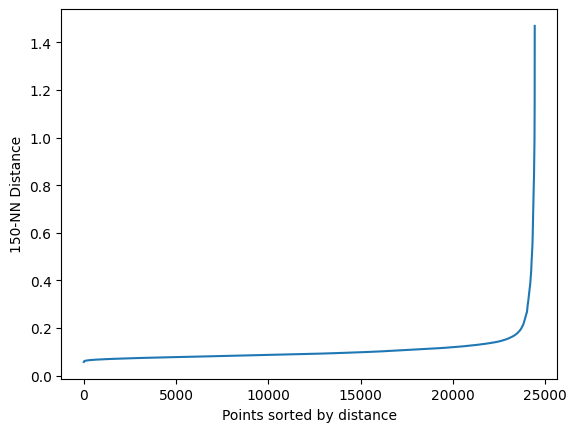

In [243]:
plot_kdist_graph(sample_mm_scl, preference_metrics_no_meat)

#### Models

##### 3 clusters

In [316]:
dbscan = DBSCAN(eps=0.1, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_mm_scl)
dbscan_n_clusters = len(np.unique(dbscan_labels))
sample_original['mm_dbs3'] = dbscan_labels

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_mm_scl.shape[0],2))

Number of estimated clusters  : 4
Counter of cluster labels     : Counter({np.int64(1): 10397, np.int64(0): 7470, np.int64(2): 5300, np.int64(-1): 1259})
Percentage of noise rows      : 5.15


In [317]:
groupby_mean(sample_original, 'mm_dbs3', True)

# observations per cluster: [1259, 7470, 10397, 5300]


mm_dbs3,-1,0,1,2
beer,74.380000,83.890000,45.100000,44.980000
bottled_water,57.450000,84.160000,44.570000,44.810000
bread,46.170000,29.760000,29.730000,18.290000
meat,28.010000,0.750000,0.870000,0.840000
dairy,72.220000,29.880000,36.060000,82.820000
fresh_foods,92.310000,32.360000,91.890000,31.880000
frozen_foods,116.800000,109.160000,56.790000,32.460000
fruit_beverages,69.900000,20.470000,80.010000,20.240000
pastry,67.260000,30.600000,71.820000,30.600000
sodas,74.810000,32.350000,32.700000,32.030000


outliers | beer+water+frozen | fresh+beverage+frozen+pastry | dairy

##### 4 clusters

In [318]:
dbscan = DBSCAN(eps=0.1, min_samples=80, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_mm_scl)
dbscan_n_clusters = len(np.unique(dbscan_labels))
sample_original['mm_dbs4'] = dbscan_labels

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_mm_scl.shape[0],2))

Number of estimated clusters  : 5
Counter of cluster labels     : Counter({np.int64(1): 9456, np.int64(0): 7460, np.int64(2): 5114, np.int64(-1): 1656, np.int64(3): 740})
Percentage of noise rows      : 6.78


In [319]:
groupby_mean(sample_original, 'mm_dbs4', True)

# observations per cluster: [1656, 7460, 9456, 5114, 740]


mm_dbs4,-1,0,1,2,3
beer,67.730000,83.880000,45.060000,44.970000,45.480000
bottled_water,54.770000,84.150000,44.530000,44.770000,45.150000
bread,41.950000,29.760000,29.730000,17.950000,29.860000
meat,21.730000,0.730000,0.870000,0.830000,0.590000
dairy,71.930000,29.880000,31.820000,82.880000,82.690000
fresh_foods,80.660000,32.350000,97.510000,31.720000,31.260000
frozen_foods,98.090000,109.150000,59.160000,32.310000,31.800000
fruit_beverages,59.950000,20.470000,85.600000,20.300000,20.090000
pastry,67.550000,30.600000,67.890000,30.580000,112.960000
sodas,65.220000,32.360000,32.810000,32.010000,30.100000


outliers | beer+water+frozen | fresh+beverage+frozen+pastry | dairy | pastry+wines+dairy

##### 5 clusters

In [9]:
dbscan = DBSCAN(eps=0.09, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_mm_scl)
sample_original['mm_dbs5'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_mm_scl.shape[0],2))

Number of estimated clusters  : 6
Counter of cluster labels     : Counter({np.int64(0): 7405, np.int64(1): 5120, np.int64(4): 5063, np.int64(2): 3020, np.int64(3): 1931, np.int64(-1): 1887})
Percentage of noise rows      : 7.73


In [321]:
groupby_mean(sample_original, 'mm_dbs5', True)

# observations per cluster: [1887, 7405, 5120, 3020, 1931, 5063]


mm_dbs5,-1,0,1,2,3,4
beer,66.570000,83.850000,44.990000,45.010000,45.210000,44.940000
bottled_water,54.660000,84.140000,44.550000,44.430000,44.890000,44.790000
bread,40.500000,29.740000,29.790000,29.650000,29.640000,17.870000
meat,19.750000,0.680000,0.770000,1.000000,0.600000,0.780000
dairy,68.400000,29.830000,29.870000,29.880000,59.040000,83.100000
fresh_foods,79.740000,32.240000,107.290000,106.940000,31.200000,31.700000
frozen_foods,96.050000,109.030000,81.750000,31.650000,31.440000,31.900000
fruit_beverages,59.220000,20.430000,95.400000,95.110000,20.050000,20.280000
pastry,66.560000,30.540000,30.600000,112.990000,112.770000,30.550000
sodas,62.790000,32.180000,32.640000,33.000000,31.150000,31.970000


outliers | beer+water+frozen | fresh+beverage+frozen | pastry+fresh+beverage | pastry+dairy | dairy

##### 6 clusters

In [324]:
dbscan = DBSCAN(eps=0.085, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_mm_scl)
sample_original['mm_dbs6'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_mm_scl.shape[0],2))

Number of estimated clusters  : 7
Counter of cluster labels     : Counter({np.int64(0): 7355, np.int64(1): 5035, np.int64(4): 4787, np.int64(2): 2979, np.int64(-1): 2569, np.int64(3): 1043, np.int64(5): 658})
Percentage of noise rows      : 10.52


In [325]:
groupby_mean(sample_original, 'mm_dbs6', True)

# observations per cluster: [2569, 7355, 5035, 2979, 1043, 4787, 658]


mm_dbs6,-1,0,1,2,3,4,5
beer,61.690000,83.850000,44.960000,45.000000,45.080000,44.950000,45.330000
bottled_water,52.840000,84.150000,44.540000,44.410000,44.710000,44.790000,45.070000
bread,37.260000,29.740000,29.760000,29.650000,29.430000,17.450000,29.830000
meat,14.910000,0.670000,0.730000,0.970000,0.550000,0.760000,0.550000
dairy,67.660000,29.830000,29.830000,29.870000,41.020000,83.150000,83.170000
fresh_foods,71.170000,32.170000,107.210000,106.930000,31.440000,31.640000,30.730000
frozen_foods,82.200000,109.020000,81.930000,31.530000,31.180000,31.790000,31.660000
fruit_beverages,52.750000,20.400000,95.350000,95.090000,20.170000,20.280000,19.850000
pastry,66.190000,30.510000,30.500000,112.890000,112.630000,30.520000,112.810000
sodas,54.930000,32.210000,32.640000,32.880000,31.650000,31.960000,29.380000


outliers | beer+water+frozen | fresh+beverage+frozen | fresh+beverage+pastry | pastry | dairy | pastry+wines+dairy

#### Comparison

In [382]:
clusters_comparison(sample_original, 'mm_dbs4', 'mm_dbs3')

,mm_dbs3 0 Cluster,mm_dbs3 1 Cluster,mm_dbs3 2 Cluster,mm_dbs3 3 Cluster
mm_dbs4 0 Cluster,1259,10,200,187
mm_dbs4 1 Cluster,0,7460,0,0
mm_dbs4 2 Cluster,0,0,9456,0
mm_dbs4 3 Cluster,0,0,1,5113
mm_dbs4 4 Cluster,0,0,740,0


In [381]:
clusters_comparison(sample_original, 'mm_dbs5', 'mm_dbs4')

,mm_dbs4 0 Cluster,mm_dbs4 1 Cluster,mm_dbs4 2 Cluster,mm_dbs4 3 Cluster,mm_dbs4 4 Cluster
mm_dbs5 0 Cluster,1577,55,143,96,16
mm_dbs5 1 Cluster,0,7405,0,0,0
mm_dbs5 2 Cluster,3,0,5117,0,0
mm_dbs5 3 Cluster,4,0,3016,0,0
mm_dbs5 4 Cluster,27,0,1179,1,724
mm_dbs5 5 Cluster,45,0,1,5017,0


In [380]:
clusters_comparison(sample_original, 'mm_dbs6', 'mm_dbs5')

,mm_dbs5 0 Cluster,mm_dbs5 1 Cluster,mm_dbs5 2 Cluster,mm_dbs5 3 Cluster,mm_dbs5 4 Cluster,mm_dbs5 5 Cluster
mm_dbs6 0 Cluster,1887,50,83,42,231,276
mm_dbs6 1 Cluster,0,7355,0,0,0,0
mm_dbs6 2 Cluster,0,0,5035,0,0,0
mm_dbs6 3 Cluster,0,0,2,2977,0,0
mm_dbs6 4 Cluster,0,0,0,1,1042,0
mm_dbs6 5 Cluster,0,0,0,0,0,4787
mm_dbs6 6 Cluster,0,0,0,0,658,0


### Robust Scaler <a id='dbs-rb'></a>

#### Plot

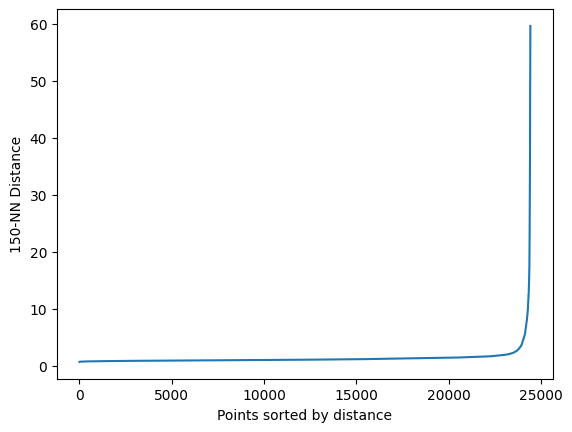

In [244]:
plot_kdist_graph(sample_rb_scl, preference_metrics_no_meat)

#### Models

##### 3 clusters

In [338]:
dbscan = DBSCAN(eps=1.3, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_rb_scl)
sample_original['rb_dbs3'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_rb_scl.shape[0],2))

Number of estimated clusters  : 4
Counter of cluster labels     : Counter({np.int64(0): 12710, np.int64(2): 5290, np.int64(1): 5188, np.int64(-1): 1238})
Percentage of noise rows      : 5.07


In [340]:
groupby_mean(sample_original, 'rb_dbs3', True)

# observations per cluster: [1238, 12710, 5188, 5290]


rb_dbs3,-1,0,1,2
beer,75.140000,67.850000,45.150000,44.990000
bottled_water,57.130000,67.860000,44.620000,44.830000
bread,47.730000,29.710000,29.590000,18.190000
meat,29.250000,0.760000,0.820000,0.790000
dairy,71.830000,29.870000,42.150000,83.320000
fresh_foods,93.300000,63.050000,76.320000,32.050000
frozen_foods,118.310000,98.000000,31.720000,31.820000
fruit_beverages,71.520000,51.060000,64.620000,20.290000
pastry,71.190000,30.480000,112.810000,30.490000
sodas,79.760000,32.270000,32.350000,31.940000


outliers | beer+water+frozen+(fresh+beverage) | pastry+fresh+beverage | dairy

##### 5 clusters

In [10]:
dbscan = DBSCAN(eps=1.22, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_rb_scl)
sample_original['rb_dbs5'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_rb_scl.shape[0],2))

Number of estimated clusters  : 6
Counter of cluster labels     : Counter({np.int64(0): 7436, np.int64(1): 5164, np.int64(2): 5133, np.int64(3): 4531, np.int64(-1): 1477, np.int64(4): 685})
Percentage of noise rows      : 6.05


In [359]:
groupby_mean(sample_original, 'rb_dbs5', True)

# observations per cluster: [1477, 7436, 5164, 5133, 4531, 685]


rb_dbs5,-1,0,1,2,3,4
beer,71.540000,83.810000,45.040000,45.110000,45.000000,44.950000
bottled_water,56.240000,84.120000,44.620000,44.610000,44.760000,45.410000
bread,44.420000,29.680000,29.730000,29.590000,16.500000,29.220000
meat,25.150000,0.700000,0.750000,0.780000,0.820000,0.650000
dairy,69.160000,29.830000,29.840000,41.970000,83.280000,83.390000
fresh_foods,87.140000,32.410000,107.200000,76.460000,31.840000,32.620000
frozen_foods,109.930000,109.120000,81.900000,31.600000,31.820000,32.020000
fruit_beverages,66.080000,20.510000,95.170000,64.800000,20.380000,19.750000
pastry,68.270000,30.400000,30.470000,112.790000,30.460000,30.520000
sodas,73.810000,32.060000,32.480000,32.140000,31.980000,30.110000


outliers | beer+water+frozen | fresh+beverage+frozen | pastry+fresh+frozen | dairy | veggies+wines+dairy

##### 6 clusters

In [369]:
dbscan = DBSCAN(eps=1.03, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_rb_scl)
sample_original['rb_dbs6'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_rb_scl.shape[0],2))

Number of estimated clusters  : 7
Counter of cluster labels     : Counter({np.int64(0): 7279, np.int64(1): 4977, np.int64(3): 4100, np.int64(2): 4013, np.int64(-1): 2868, np.int64(4): 695, np.int64(5): 494})
Percentage of noise rows      : 11.74


In [370]:
groupby_mean(sample_original, 'rb_dbs6', True)

# observations per cluster: [2868, 7279, 4977, 4013, 4100, 695, 494]


rb_dbs6,-1,0,1,2,3,4,5
beer,61.190000,83.840000,44.940000,44.980000,44.890000,45.390000,44.810000
bottled_water,52.740000,84.180000,44.580000,44.480000,44.750000,45.360000,45.500000
bread,35.930000,29.660000,29.680000,29.520000,16.110000,29.770000,29.490000
meat,14.040000,0.630000,0.640000,0.710000,0.700000,0.490000,0.640000
dairy,66.890000,29.790000,29.740000,32.630000,83.200000,83.380000,83.500000
fresh_foods,69.100000,32.250000,107.220000,86.890000,31.680000,30.860000,31.900000
frozen_foods,80.670000,108.980000,81.810000,31.400000,31.580000,31.280000,32.180000
fruit_beverages,51.710000,20.400000,95.230000,75.370000,20.310000,19.970000,19.760000
pastry,63.340000,30.250000,30.290000,112.630000,30.310000,112.670000,30.250000
sodas,56.480000,31.790000,32.300000,32.100000,31.530000,28.060000,28.150000


beer+water+frozen | fresh+beverage+frozen | pastry+fresh+beverage | dairy | pastry+dairy | veggies+dairy

#### Comparison

In [379]:
clusters_comparison(sample_original, 'rb_dbs5', 'rb_dbs3')

,rb_dbs3 0 Cluster,rb_dbs3 1 Cluster,rb_dbs3 2 Cluster,rb_dbs3 3 Cluster
rb_dbs5 0 Cluster,1238,108,55,76
rb_dbs5 1 Cluster,0,7436,0,0
rb_dbs5 2 Cluster,0,5164,0,0
rb_dbs5 3 Cluster,0,0,5133,0
rb_dbs5 4 Cluster,0,2,0,4529
rb_dbs5 5 Cluster,0,0,0,685


In [378]:
clusters_comparison(sample_original, 'rb_dbs6', 'rb_dbs5')

,rb_dbs5 0 Cluster,rb_dbs5 1 Cluster,rb_dbs5 2 Cluster,rb_dbs5 3 Cluster,rb_dbs5 4 Cluster,rb_dbs5 5 Cluster
rb_dbs6 0 Cluster,1477,157,187,425,430,192
rb_dbs6 1 Cluster,0,7279,0,0,0,0
rb_dbs6 2 Cluster,0,0,4977,0,0,0
rb_dbs6 3 Cluster,0,0,0,4013,0,0
rb_dbs6 4 Cluster,0,0,0,0,4100,0
rb_dbs6 5 Cluster,0,0,0,695,0,0
rb_dbs6 6 Cluster,0,0,0,0,1,493


### Conclusions <a id='conc'></a>

Based on the results obtained through DBScan, clustering solutions with 4 and 6 clusters were eliminated from further analysis. This happens as clusterings with 6 clusters presented high percentages of outliers (>10%) and as a solution with 4 clusters was not found for the robust scaled data. 

Having said this, it was decided to compare the until now found solutions with minmax and robust scaled data and 3 or 5 clusters.

| Method | Scaler | # Clusters | bwf | fbfp | fbf | pfb | d | dp | dpvw | dvw | s | g | note |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| kmeans | minmax | 3 | x | x |  |  |  | x |  | | | |  |
| kmeans | robust | 3 |  |  |  | x |  |  |  |  | x | x | disregarded |
| ward | minmax | 3 | x | x |  |  |  | x |  |  |  |  |  |
| ward | robust | 3 |  |  |  | x |  |  |  |  | x | x | disregarded |
| dbscan | minmax | 3 | x | x |  |  | x |  |  |  |  |  |  |
| dbscan | robust | 3 |  |  |  | x | x |  |  | | | x | disregarded |
| kmeans | minmax | 5 | x |  | x | x | x |  | x | | | |  |
| kmeans | robust | 5 |  |  |  | x | x |  |  | x | x | x | disregarded |
| ward | minmax | 5 | x |  | x | x |  | x | x |  |  |  |  |
| dbscan | minmax | 5 | x |  | x | x | x | x |  |  |  |  |  |
| dbscan | robust | 5 | x |  | x | x | x |  | x | | | |  |

**Note**: The variables noted as "disregarded" were excluded as they included a cluster significantly larger (and too generic) than the other ones.


- bwf -> beer+water+frozen
- fbfp -> fresh+beverage+frozen+pastry
- fbf -> fresh+beverage+frozen
- pfb -> pastry+fresh+beverage
- d -> dairy
- dp -> dairy+pastry
- dpvw -> dairy+pastry+veggies+wine
- dvw -> dairy+veggies+wine
- s -> spenders
- g -> general


With this analysis it was concluded that a best solution for **3 clusters** would include: 
- beer+water+frozen
- fresh+beverage+frozen+pastry
- dairy+pastry

(this is the case of kmeans and ward with minmax scaler - since they gave almost identical results and kmeans is more computationally efficient, ward was discarded)

And a best solution for **5 clusters** would include:
-  beer+water+frozen
- fresh+beverage+frozen
- pastry+fresh+beverage
- dairy
- dairy+pastry+veggies+wine

(this is the case for kmeans with minmax scaler and dbscan with robust scaler)

# 5. UMAP <a id='u'></a>

In this section, the three clustering solutions mentioned in the [conclusion of the previous section](#conc) (minmax kmeans with 3 clusters, minmax kmeans with 5 clusters and robust dbscan with 5 clusters) were visualized using umap to ensure the custers' consistency. Then, if deemed acceptable, the clustering solutions were implemented to the whole dataset.

### Create the embeddings

In [25]:
umap_object = umap.UMAP(random_state=1)

In [ ]:
# embeddings for samples
umap_embedding_mm = umap_object.fit_transform(sample_mm_scl)
umap_embedding_rb = umap_object.fit_transform(sample_rb_scl)

In [26]:
# embeddings for the whole dataset
umap_embedding_mm_all = umap_object.fit_transform(preference_mm_scl)
# umap_embedding_rb_all = umap_object.fit_transform(preference_rb_scl)

### UMAP for samples

##### MinMax - Kmeans - 3 clusters

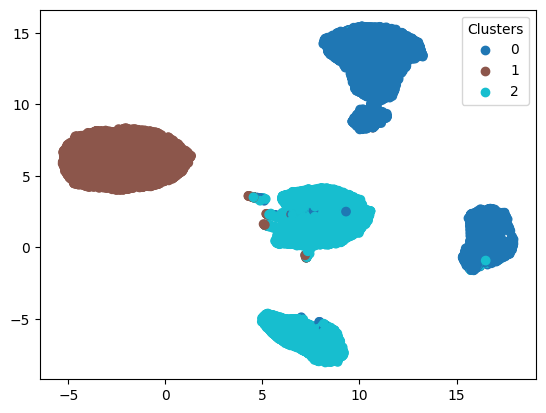

In [384]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_kmeans3'])

##### MinMax - Kmeans - 5 clusters

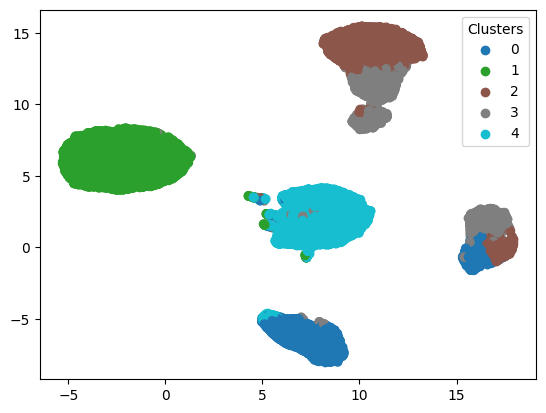

In [385]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_kmeans5'])

##### Robust - DBScan - 5 clusters

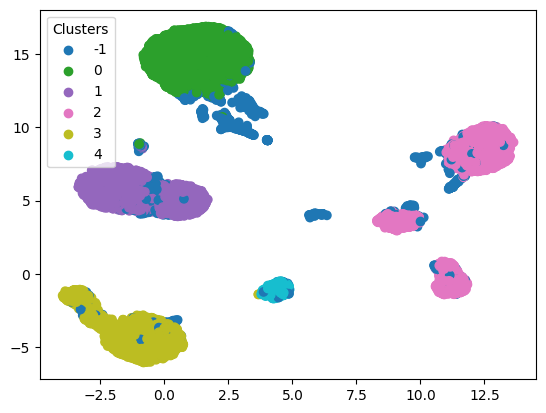

In [388]:
visualize_dimensionality_reduction(umap_embedding_rb, sample_original['rb_dbs5'])

##### Conclusion
With these visualizations, the kmeans solution with 5 clusters and minmax scaled data was excluded. The remaining 2 solutions were implemented into the entirety of the dataset and new umaps were plotted.

# 6. Final Solutions <a id='f'></a>

## Generalization to the whole dataset

### Kmeans - MinMax - 3 clusters

In [37]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20,  random_state = 1).fit(preference_mm_scl)
preference['mm_kmeans3'] = kmeans.predict(preference_mm_scl)

In [38]:
groupby_mean(preference, 'mm_kmeans3', True)

# observations per cluster: [38691, 39532, 43906]


mm_kmeans3,0,1,2
beer,45.510000,84.860000,46.370000
bottled_water,44.650000,84.200000,44.710000
bread,22.270000,30.530000,30.980000
meat,1.300000,2.020000,3.220000
dairy,76.960000,31.200000,32.420000
fresh_foods,32.640000,33.980000,109.240000
frozen_foods,33.560000,111.690000,66.330000
fruit_beverages,20.610000,21.360000,96.160000
pastry,55.460000,31.660000,62.920000
sodas,34.040000,34.900000,35.670000


dairy+pastry | beer+water+frozen | fresh+beverage+frozen+pastry

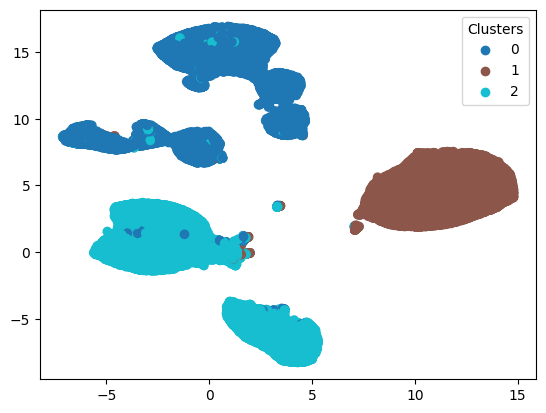

In [43]:
visualize_dimensionality_reduction(umap_embedding_mm_all, preference['mm_kmeans3'])

### DBScan - Robust - 5 clusters

In [39]:
dbscan = DBSCAN(eps=0.82, min_samples=27, n_jobs=4)
dbscan_labels = dbscan.fit_predict(preference_rb_scl)
preference['rb_dbs5'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/preference_rb_scl.shape[0],2))

Number of estimated clusters  : 6
Counter of cluster labels     : Counter({np.int64(3): 36309, np.int64(1): 24440, np.int64(4): 24312, np.int64(0): 20318, np.int64(-1): 13992, np.int64(2): 2758})
Percentage of noise rows      : 11.46


In [40]:
groupby_mean(preference, 'rb_dbs5', True)

# observations per cluster: [13992, 20318, 24440, 2758, 36309, 24312]


rb_dbs5,-1,0,1,2,3,4
beer,62.600000,44.950000,44.930000,44.880000,83.930000,44.950000
bottled_water,54.440000,44.620000,44.620000,44.650000,84.070000,44.600000
bread,35.670000,16.200000,29.590000,29.510000,29.620000,29.630000
meat,14.730000,0.610000,0.580000,0.460000,0.620000,0.620000
dairy,64.810000,83.220000,41.230000,83.180000,29.700000,29.690000
fresh_foods,72.630000,31.850000,77.520000,31.450000,31.980000,106.790000
frozen_foods,84.630000,31.140000,31.200000,30.900000,109.110000,82.270000
fruit_beverages,53.520000,20.140000,65.820000,19.810000,20.150000,95.040000
pastry,63.180000,30.110000,112.590000,29.980000,30.210000,30.140000
sodas,58.630000,31.460000,31.570000,30.460000,32.130000,32.120000


outliers | dairy | pastry+fresh+beverage | dairy+veggies+wines | beer+water+frozen | fresh+beverage+frozen

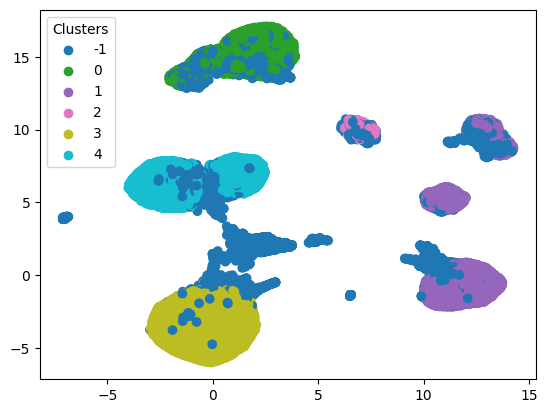

In [44]:
visualize_dimensionality_reduction(umap_embedding_rb_all, preference['rb_dbs5'])

#### Imputing labels for outliers

To impute the lables for the **outliers** identified by **DBScan**, two approaches were tested and validated using, once again, a **UMAP** visualization.

##### Imputing lables using centroids

In [101]:
# Get the clusters centroids
centroids = groupby_mean(preference, 'rb_dbs5').T
centroids = centroids.drop(columns=['Counts'])
centroids = centroids.drop('data')
centroids = centroids.drop(-1)
centroids

,beer,bottled_water,bread,meat,dairy,fresh_foods,frozen_foods,fruit_beverages,pastry,sodas,toiletries,veggies,wines
rb_dbs5,,,,,,,,,,,,,
0,44.95,44.62,16.20,0.61,83.22,31.85,31.14,20.14,30.11,31.46,19.84,17.21,14.35
1,44.93,44.62,29.59,0.58,41.23,77.52,31.20,65.82,112.59,31.57,14.44,17.28,14.23
2,44.88,44.65,29.51,0.46,83.18,31.45,30.90,19.81,29.98,30.46,19.49,95.97,47.25
3,83.93,84.07,29.62,0.62,29.70,31.98,109.11,20.15,30.21,32.13,20.05,17.84,19.08
4,44.95,44.60,29.63,0.62,29.69,106.79,82.27,95.04,30.14,32.12,19.91,18.96,8.50


In [102]:
outliers = preference[preference['rb_dbs5'] == -1]
outliers

,beer,bottled_water,bread,meat,dairy,fresh_foods,frozen_foods,fruit_beverages,pastry,sodas,toiletries,veggies,wines,mm_kmeans3,rb_dbs5
0,75,38,27,59,88,148,150,105,27,24,27,10,0,2,-1
1,46,58,14,7,90,134,26,20,31,0,2,18,2,2,-1
6,52,49,32,0,92,30,58,29,118,40,5,65,16,0,-1
9,32,46,27,0,89,60,77,16,113,76,12,36,56,0,-1
13,54,42,34,0,89,164,38,43,31,56,18,0,46,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122117,51,48,29,1,100,88,234,109,26,94,20,0,6,2,-1
122118,94,87,29,1,100,15,227,38,26,122,10,0,21,1,-1
122119,48,40,40,8,100,35,88,45,34,78,13,83,46,0,-1
122120,62,42,12,2,100,25,118,22,32,33,18,26,10,0,-1


In [103]:
# Calculate the distances between the outliers and the centroids
centroids_array = centroids.to_numpy()
outliers_array = outliers.drop(columns=['mm_kmeans3', 'rb_dbs5']).to_numpy()
distances = cdist(outliers_array, centroids_array)

# Assign the outliers to the closest cluster
assigned_clusters = np.argmin(distances, axis=1)
outliers['rb_dbs5'] = assigned_clusters

In [104]:
# Create a copy of the preference dataframe
preference_copy = preference.copy()
# Drop the rows with -1 in the rb_dbs5 column
preference_copy = preference_copy[preference_copy['rb_dbs5'] != -1] # 13992
# Concatenate the copy with the outliers (with assigned clusters)
preference_complete = pd.concat([preference_copy, outliers], ignore_index=False)
# Sort the dataframe by index
preference_complete = preference_complete.sort_index()
preference_complete

,beer,bottled_water,bread,meat,dairy,fresh_foods,frozen_foods,fruit_beverages,pastry,sodas,toiletries,veggies,wines,mm_kmeans3,rb_dbs5
0,75,38,27,59,88,148,150,105,27,24,27,10,0,2,4
1,46,58,14,7,90,134,26,20,31,0,2,18,2,2,0
2,39,57,17,0,89,39,0,25,32,17,33,26,0,0,0
3,50,41,17,0,89,26,66,16,29,31,28,0,8,0,0
4,43,46,13,0,90,0,57,27,45,46,19,23,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122124,47,36,17,18,100,33,33,39,26,27,48,54,0,0,0
122125,50,43,22,1,100,28,40,36,27,47,15,24,3,0,0
122126,61,48,13,9,100,61,41,26,25,27,23,11,0,0,0
122127,50,50,12,0,100,49,21,27,27,10,4,34,0,0,0


##### Imputing lables using KNN

In [121]:
preference_copy2 = preference.copy()

In [122]:
preference_copy2['rb_dbs5'] = preference_copy2['rb_dbs5'].replace(-1, np.nan)

In [123]:
preference_complete2 = knn_imputer(preference_copy2, k=1, exclude_columns=['mm_kmeans3'], weights='uniform')

In [140]:
preference_complete2['rb_dbs5'] = preference_complete2['rb_dbs5'].round().astype(int)
preference_complete2

,beer,bottled_water,bread,meat,dairy,fresh_foods,frozen_foods,fruit_beverages,pastry,sodas,toiletries,veggies,wines,mm_kmeans3,rb_dbs5
0,75.0,38.0,27.0,59.0,88.0,148.0,150.0,105.0,27.0,24.0,27.0,10.0,0.0,2,4
1,46.0,58.0,14.0,7.0,90.0,134.0,26.0,20.0,31.0,0.0,2.0,18.0,2.0,2,0
2,39.0,57.0,17.0,0.0,89.0,39.0,0.0,25.0,32.0,17.0,33.0,26.0,0.0,0,0
3,50.0,41.0,17.0,0.0,89.0,26.0,66.0,16.0,29.0,31.0,28.0,0.0,8.0,0,0
4,43.0,46.0,13.0,0.0,90.0,0.0,57.0,27.0,45.0,46.0,19.0,23.0,9.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122124,47.0,36.0,17.0,18.0,100.0,33.0,33.0,39.0,26.0,27.0,48.0,54.0,0.0,0,0
122125,50.0,43.0,22.0,1.0,100.0,28.0,40.0,36.0,27.0,47.0,15.0,24.0,3.0,0,0
122126,61.0,48.0,13.0,9.0,100.0,61.0,41.0,26.0,25.0,27.0,23.0,11.0,0.0,0,0
122127,50.0,50.0,12.0,0.0,100.0,49.0,21.0,27.0,27.0,10.0,4.0,34.0,0.0,0,0


##### Label imputation comparison

Centroid

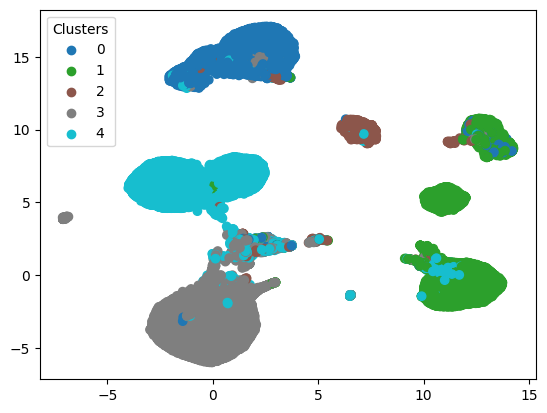

In [132]:
visualize_dimensionality_reduction(umap_embedding_rb_all, preference_complete['rb_dbs5'])

KNN

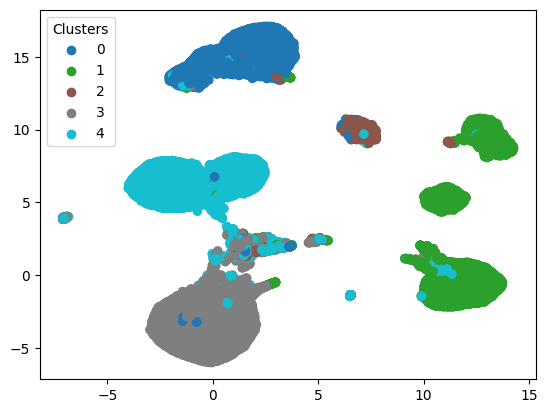

In [126]:
visualize_dimensionality_reduction(umap_embedding_rb_all, preference_complete2['rb_dbs5'])

Based on the UMAPs it was decided to imput the outliers with the knn inputer.

In [ ]:
preference['rb_dbs5'] = preference_complete2['rb_dbs5']

### (DBScan - MinMax - 5 clusters)

Due to the fact that there was no clustering solution found in the demographic clustering perspective with robust scaled data, and since the DBScan solution with the minmax scaled data input was similar to the one with the robust scaled data input, it was decided to include this option in the merging of perspectives analysis.

In [23]:
dbscan = DBSCAN(eps=0.07, min_samples=30, n_jobs=4)
dbscan_labels = dbscan.fit_predict(preference_mm_scl)
preference['mm_dbs5'] = dbscan_labels
dbscan_n_clusters = len(np.unique(dbscan_labels))

print("Number of estimated clusters  : %d" % dbscan_n_clusters)
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/preference_mm_scl.shape[0],2))

Number of estimated clusters  : 6
Counter of cluster labels     : Counter({np.int64(4): 36923, np.int64(3): 24844, np.int64(0): 24559, np.int64(2): 15243, np.int64(-1): 10481, np.int64(1): 10079})
Percentage of noise rows      : 8.58


In [24]:
groupby_mean(preference, 'mm_dbs5', True)

# observations per cluster: [10481, 24559, 10079, 15243, 24844, 36923]


mm_dbs5,-1,0,1,2,3,4
beer,65.970000,44.950000,44.970000,44.930000,44.990000,83.960000
bottled_water,55.710000,44.590000,44.610000,44.590000,44.570000,84.050000
bread,38.290000,17.980000,29.640000,29.670000,29.710000,29.700000
meat,18.860000,0.660000,0.580000,0.680000,0.670000,0.670000
dairy,66.380000,83.240000,59.780000,29.790000,29.750000,29.760000
fresh_foods,80.100000,31.820000,31.530000,106.890000,106.800000,31.980000
frozen_foods,94.160000,31.240000,31.280000,31.380000,82.350000,109.210000
fruit_beverages,58.370000,20.110000,20.150000,95.030000,95.090000,20.160000
pastry,64.720000,30.350000,112.700000,112.880000,30.390000,30.460000
sodas,62.050000,32.110000,32.120000,32.310000,32.580000,32.460000


outliers | dairy | pastry(dairy) | pastry+fresh+beverage | fresh+beverage+frozen | beer+water+frozen

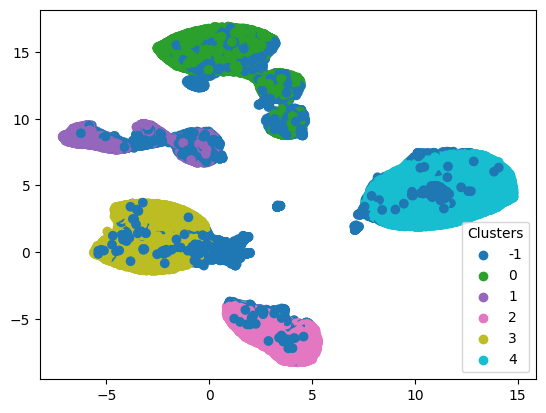

In [27]:
visualize_dimensionality_reduction(umap_embedding_mm_all, preference['mm_dbs5'])

#### Imputing labels for outliers

To impute the lables for the **outliers** identified by **DBScan**, two approaches were tested and validated using, once again, a **UMAP** visualization.

##### Imputing lables using centroids

In [28]:
# Get the clusters centroids
centroids = groupby_mean(preference, 'mm_dbs5').T
centroids = centroids.drop(columns=['Counts'])
centroids = centroids.drop('data')
centroids = centroids.drop(-1)
centroids

,beer,bottled_water,bread,meat,dairy,fresh_foods,frozen_foods,fruit_beverages,pastry,sodas,toiletries,veggies,wines
mm_dbs5,,,,,,,,,,,,,
0,44.95,44.59,17.98,0.66,83.24,31.82,31.24,20.11,30.35,32.11,19.81,27.51,19.30
1,44.97,44.61,29.64,0.58,59.78,31.53,31.28,20.15,112.70,32.12,15.80,17.66,23.20
2,44.93,44.59,29.67,0.68,29.79,106.89,31.38,95.03,112.88,32.31,13.49,18.00,8.46
3,44.99,44.57,29.71,0.67,29.75,106.80,82.35,95.09,30.39,32.58,19.84,19.36,8.45
4,83.96,84.05,29.70,0.67,29.76,31.98,109.21,20.16,30.46,32.46,20.01,18.06,19.08


In [29]:
outliers = preference[preference['mm_dbs5'] == -1]
outliers

,beer,bottled_water,bread,meat,dairy,fresh_foods,frozen_foods,fruit_beverages,pastry,sodas,toiletries,veggies,wines,mm_kmeans3,rb_dbs5,mm_dbs5
0,75,38,27,59,88,148,150,105,27,24,27,10,0,2,4,-1
1,46,58,14,7,90,134,26,20,31,0,2,18,2,2,0,-1
6,52,49,32,0,92,30,58,29,118,40,5,65,16,0,1,-1
9,32,46,27,0,89,60,77,16,113,76,12,36,56,0,1,-1
13,54,42,34,0,89,164,38,43,31,56,18,0,46,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122115,113,42,32,26,100,80,21,138,27,27,23,91,92,0,2,-1
122116,52,46,30,0,100,93,81,185,112,12,24,39,38,2,1,-1
122117,51,48,29,1,100,88,234,109,26,94,20,0,6,2,4,-1
122118,94,87,29,1,100,15,227,38,26,122,10,0,21,1,3,-1


In [30]:
# Calculate the distances between the outliers and the centroids
centroids_array = centroids.to_numpy()
outliers_array = outliers.drop(columns=['mm_kmeans3', 'rb_dbs5', 'mm_dbs5']).to_numpy()
distances = cdist(outliers_array, centroids_array)

# Assign the outliers to the closest cluster
assigned_clusters = np.argmin(distances, axis=1)
outliers['mm_dbs5'] = assigned_clusters

In [31]:
# Create a copy of the preference dataframe
preference_copy = preference.copy()
# Drop the rows with -1 in the rb_dbs5 column
preference_copy = preference_copy[preference_copy['mm_dbs5'] != -1] # 13992
# Concatenate the copy with the outliers (with assigned clusters)
preference_complete = pd.concat([preference_copy, outliers], ignore_index=False)
# Sort the dataframe by index
preference_complete = preference_complete.sort_index()
preference_complete

,beer,bottled_water,bread,meat,dairy,fresh_foods,frozen_foods,fruit_beverages,pastry,sodas,toiletries,veggies,wines,mm_kmeans3,rb_dbs5,mm_dbs5
0,75,38,27,59,88,148,150,105,27,24,27,10,0,2,4,3
1,46,58,14,7,90,134,26,20,31,0,2,18,2,2,0,0
2,39,57,17,0,89,39,0,25,32,17,33,26,0,0,0,0
3,50,41,17,0,89,26,66,16,29,31,28,0,8,0,0,0
4,43,46,13,0,90,0,57,27,45,46,19,23,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122124,47,36,17,18,100,33,33,39,26,27,48,54,0,0,0,0
122125,50,43,22,1,100,28,40,36,27,47,15,24,3,0,0,0
122126,61,48,13,9,100,61,41,26,25,27,23,11,0,0,0,0
122127,50,50,12,0,100,49,21,27,27,10,4,34,0,0,0,0


##### Imputing lables using KNN

In [33]:
preference_copy2 = preference.copy()

In [34]:
preference_copy2['mm_dbs5'] = preference_copy2['mm_dbs5'].replace(-1, np.nan)

In [36]:
preference_complete2 = knn_imputer(preference_copy2, k=2, exclude_columns=['mm_kmeans3', 'rb_dbs5'], weights='uniform')

In [37]:
preference_complete2['mm_dbs5'] = preference_complete2['mm_dbs5'].round().astype(int)
preference_complete2

,beer,bottled_water,bread,meat,dairy,fresh_foods,frozen_foods,fruit_beverages,pastry,sodas,toiletries,veggies,wines,mm_kmeans3,rb_dbs5,mm_dbs5
0,75.0,38.0,27.0,59.0,88.0,148.0,150.0,105.0,27.0,24.0,27.0,10.0,0.0,2,4,3
1,46.0,58.0,14.0,7.0,90.0,134.0,26.0,20.0,31.0,0.0,2.0,18.0,2.0,2,0,0
2,39.0,57.0,17.0,0.0,89.0,39.0,0.0,25.0,32.0,17.0,33.0,26.0,0.0,0,0,0
3,50.0,41.0,17.0,0.0,89.0,26.0,66.0,16.0,29.0,31.0,28.0,0.0,8.0,0,0,0
4,43.0,46.0,13.0,0.0,90.0,0.0,57.0,27.0,45.0,46.0,19.0,23.0,9.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122124,47.0,36.0,17.0,18.0,100.0,33.0,33.0,39.0,26.0,27.0,48.0,54.0,0.0,0,0,0
122125,50.0,43.0,22.0,1.0,100.0,28.0,40.0,36.0,27.0,47.0,15.0,24.0,3.0,0,0,0
122126,61.0,48.0,13.0,9.0,100.0,61.0,41.0,26.0,25.0,27.0,23.0,11.0,0.0,0,0,0
122127,50.0,50.0,12.0,0.0,100.0,49.0,21.0,27.0,27.0,10.0,4.0,34.0,0.0,0,0,0


##### Label imputation comparison

Centroid

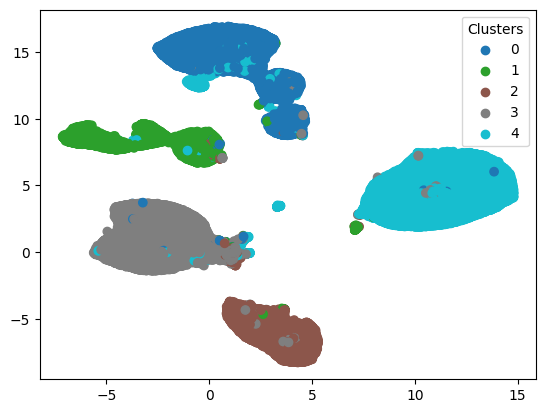

In [38]:
visualize_dimensionality_reduction(umap_embedding_mm_all, preference_complete['mm_dbs5'])

KNN

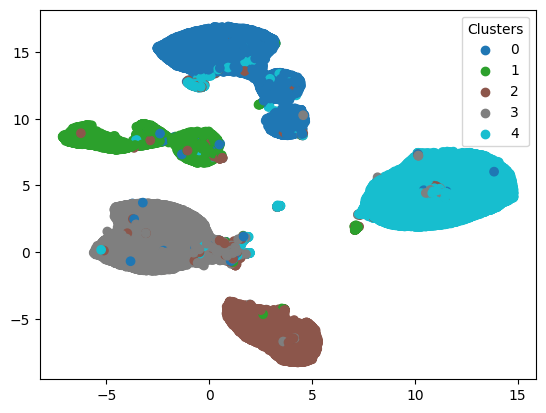

In [39]:
visualize_dimensionality_reduction(umap_embedding_mm_all, preference_complete2['mm_dbs5'])

Based on the UMAPs it was decided to imput the outliers with the centroids method.

In [41]:
preference['mm_dbs5'] = preference_complete['mm_dbs5']

### Final Solution

In [42]:
preference

,beer,bottled_water,bread,meat,dairy,fresh_foods,frozen_foods,fruit_beverages,pastry,sodas,toiletries,veggies,wines,mm_kmeans3,rb_dbs5,mm_dbs5
0,75,38,27,59,88,148,150,105,27,24,27,10,0,2,4,3
1,46,58,14,7,90,134,26,20,31,0,2,18,2,2,0,0
2,39,57,17,0,89,39,0,25,32,17,33,26,0,0,0,0
3,50,41,17,0,89,26,66,16,29,31,28,0,8,0,0,0
4,43,46,13,0,90,0,57,27,45,46,19,23,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122124,47,36,17,18,100,33,33,39,26,27,48,54,0,0,0,0
122125,50,43,22,1,100,28,40,36,27,47,15,24,3,0,0,0
122126,61,48,13,9,100,61,41,26,25,27,23,11,0,0,0,0
122127,50,50,12,0,100,49,21,27,27,10,4,34,0,0,0,0


In [43]:
preference.to_csv('Data/Final_Data/preference_perspective.csv', index=False)